<a href="https://colab.research.google.com/github/SrujanV010/Heart-Disease-Predictor/blob/main/HeartFailurePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the DataSet

In [16]:
df = pd.read_csv(r"D:\heartp\heart.csv")

### Understanding the dataset

Attribute Information:
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]


In [17]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [19]:
df.describe(include='all')

Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR ExerciseAngina     Oldpeak ST_Slope  \
count         918  918.000000            918  918.000000      918   
unique          3         NaN              2         NaN        3   
top        Normal         NaN              N         NaN     Flat   
freq          552         NaN            547         NaN      460   
mean          NaN  136.809368            NaN    0.887364      NaN   
std           NaN   25.460334            NaN    1.066570      NaN   
min           NaN   60.000000            NaN   -2.600000      NaN   
25%           NaN  120.000000            NaN    0.000000      NaN   
50%           NaN  138.000000            NaN    0.600000      NaN   
75%           NaN  156.000000            NaN    1.500000      NaN   
max           NaN  202.000000            NaN    6.200000      NaN   

        HeartDisease  
count     918.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.553377  
std         0.497414  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

In [20]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [21]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [22]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [23]:
df['FastingBS'].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

In [24]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [25]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [26]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [27]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'Count of people with and without HeartDisease')

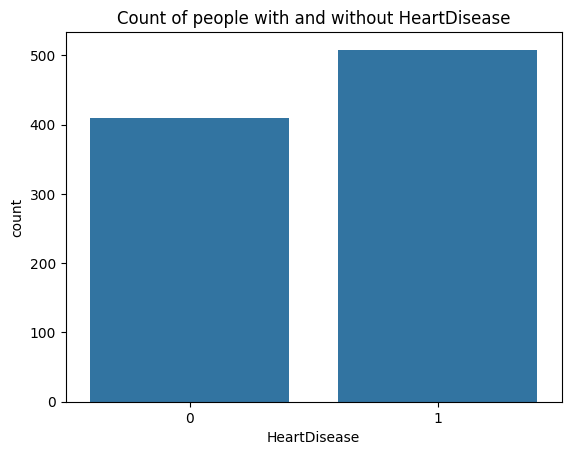

In [28]:
sns.countplot(x='HeartDisease',data=df)
plt.title('Count of people with and without HeartDisease')

### Data Cleaning

Text(0.5, 1.0, 'Distribution of Cholesterol Levels')

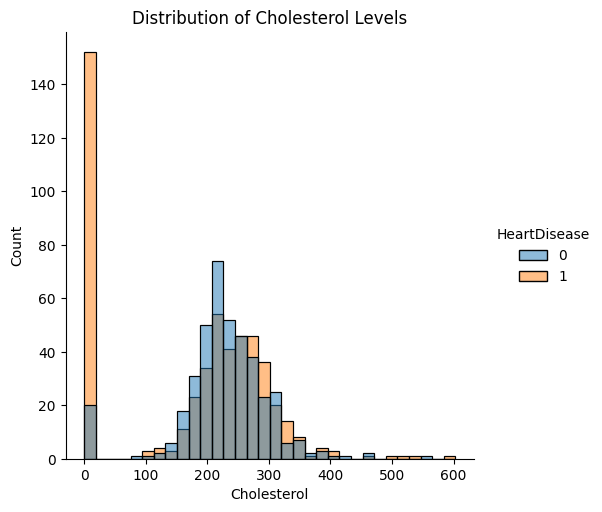

In [29]:
sns.displot(x='Cholesterol',data=df,hue='HeartDisease')
plt.title('Distribution of Cholesterol Levels')

In [30]:
df[(df['Cholesterol']==0)]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115            0          0     Normal   
294   32   M            TA         95            0          1     Normal   
295   61   M           ASY        105            0          1     Normal   
296   50   M           ASY        145            0          1     Normal   
297   57   M           ASY        110            0          1         ST   
..   ...  ..           ...        ...          ...        ...        ...   
514   43   M           ASY        122            0          0     Normal   
515   63   M           NAP        130            0          1         ST   
518   48   M           NAP        102            0          1         ST   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
293     93              Y      0.0     Flat             1  
294    127              N      0.7       Up             1  
295    110              Y      1.5       Up             1  
296    139              Y      0.7     Flat             1  
297    131              Y      1.4       Up             1  
..     ...            ...      ...      ...           ...  
514    120              N      0.5       Up             1  
515    160              N      3.0     Flat             0  
518    110              Y      1.0     Down             1  
535    122              Y      1.0     Flat             1  
536    119              Y      1.2     Flat             1  

[172 rows x 12 columns]

In [31]:
df_fill = df.copy()

In [32]:
def fill_cholesterol(value):
  if value == 0:
    return df['Cholesterol'].mean()
  else:
    return value

In [33]:
df_fill['Cholesterol'] = df_fill['Cholesterol'].apply(fill_cholesterol)

In [34]:
df_fill.loc[[293,294,295,296,297]]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115   198.799564          0     Normal   
294   32   M            TA         95   198.799564          1     Normal   
295   61   M           ASY        105   198.799564          1     Normal   
296   50   M           ASY        145   198.799564          1     Normal   
297   57   M           ASY        110   198.799564          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
293     93              Y      0.0     Flat             1  
294    127              N      0.7       Up             1  
295    110              Y      1.5       Up             1  
296    139              Y      0.7     Flat             1  
297    131              Y      1.4       Up             1

Text(0.5, 1.0, 'Distribution of Cholesterol Levels after filling')

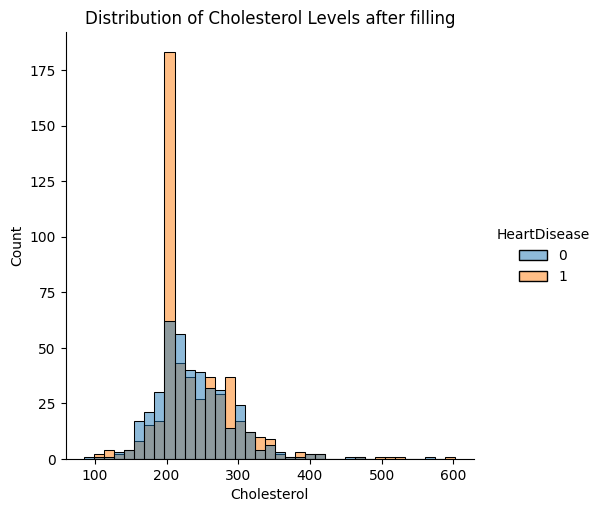

In [35]:
sns.displot(x='Cholesterol',data=df_fill,hue='HeartDisease')
plt.title('Distribution of Cholesterol Levels after filling')

Text(0.5, 1.0, 'Distribution of RestingBP')

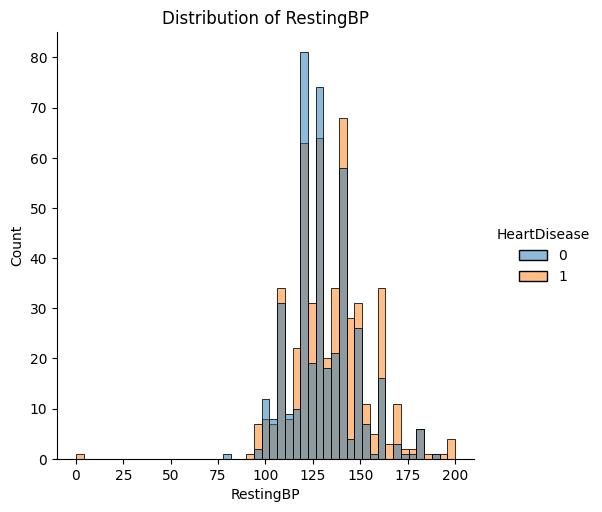

In [36]:
sns.displot(x='RestingBP',data=df_fill,hue='HeartDisease')
plt.title('Distribution of RestingBP')

In [37]:
df_fill[(df_fill['RestingBP']==0)]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0   198.799564          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N      1.5     Flat             1

In [38]:
df_fill.loc[449, 'RestingBP'] = df_fill['RestingBP'].mean()

D:\Temp\ipykernel_220\1115970835.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '132.39651416122004' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_fill.loc[449, 'RestingBP'] = df_fill['RestingBP'].mean()


In [39]:
df_fill.loc[449]

Age                       55
Sex                        M
ChestPainType            NAP
RestingBP         132.396514
Cholesterol       198.799564
FastingBS                  0
RestingECG            Normal
MaxHR                    155
ExerciseAngina             N
Oldpeak                  1.5
ST_Slope                Flat
HeartDisease               1
Name: 449, dtype: object

Text(0.5, 1.0, 'Distribution of RestingBP after filling')

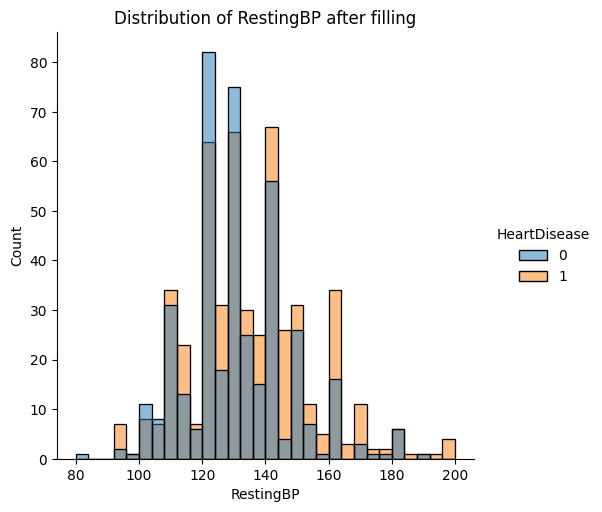

In [40]:
sns.displot(x='RestingBP',data=df_fill,hue='HeartDisease')
plt.title('Distribution of RestingBP after filling')

### Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Age')

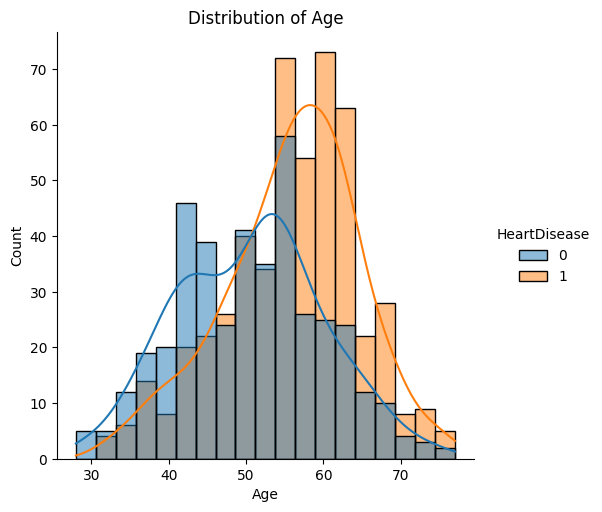

In [41]:
sns.displot(x='Age',data=df_fill,kde=True,hue='HeartDisease')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Gender & Heart Disease')

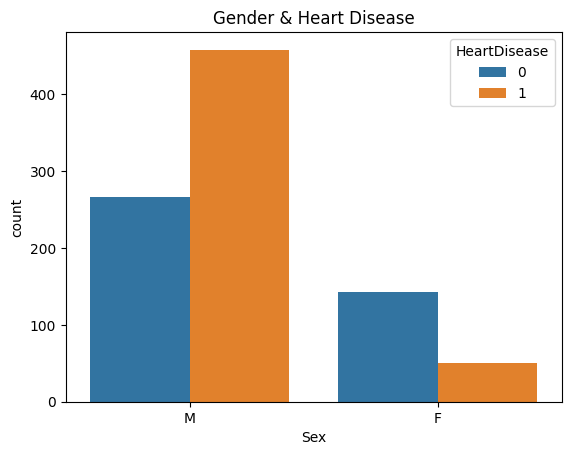

In [42]:
sns.countplot(x='Sex',data=df_fill,hue='HeartDisease')
plt.title('Gender & Heart Disease')

Text(0.5, 1.0, 'ChestPainType & Heart Disease')

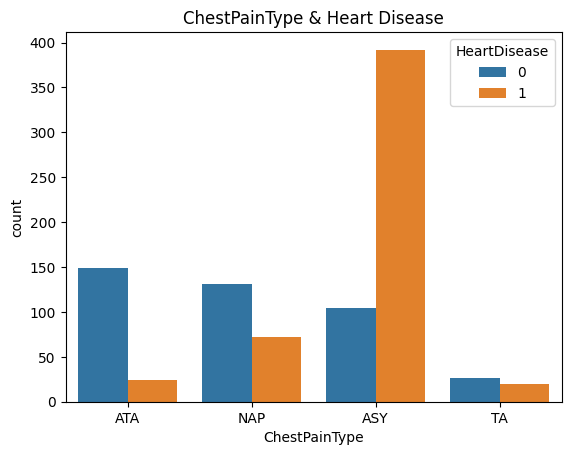

In [43]:
sns.countplot(x='ChestPainType',data=df_fill,hue='HeartDisease')
plt.title('ChestPainType & Heart Disease')

Text(0.5, 1.0, 'FastingBS & Heart Disease')

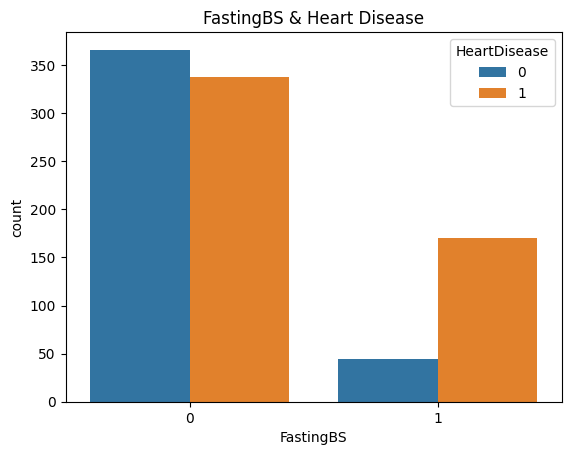

In [44]:
sns.countplot(x='FastingBS',hue='HeartDisease',data=df_fill)
plt.title('FastingBS & Heart Disease')# 1 - greater than 120; 0 - otherwise

<Figure size 960x640 with 0 Axes>

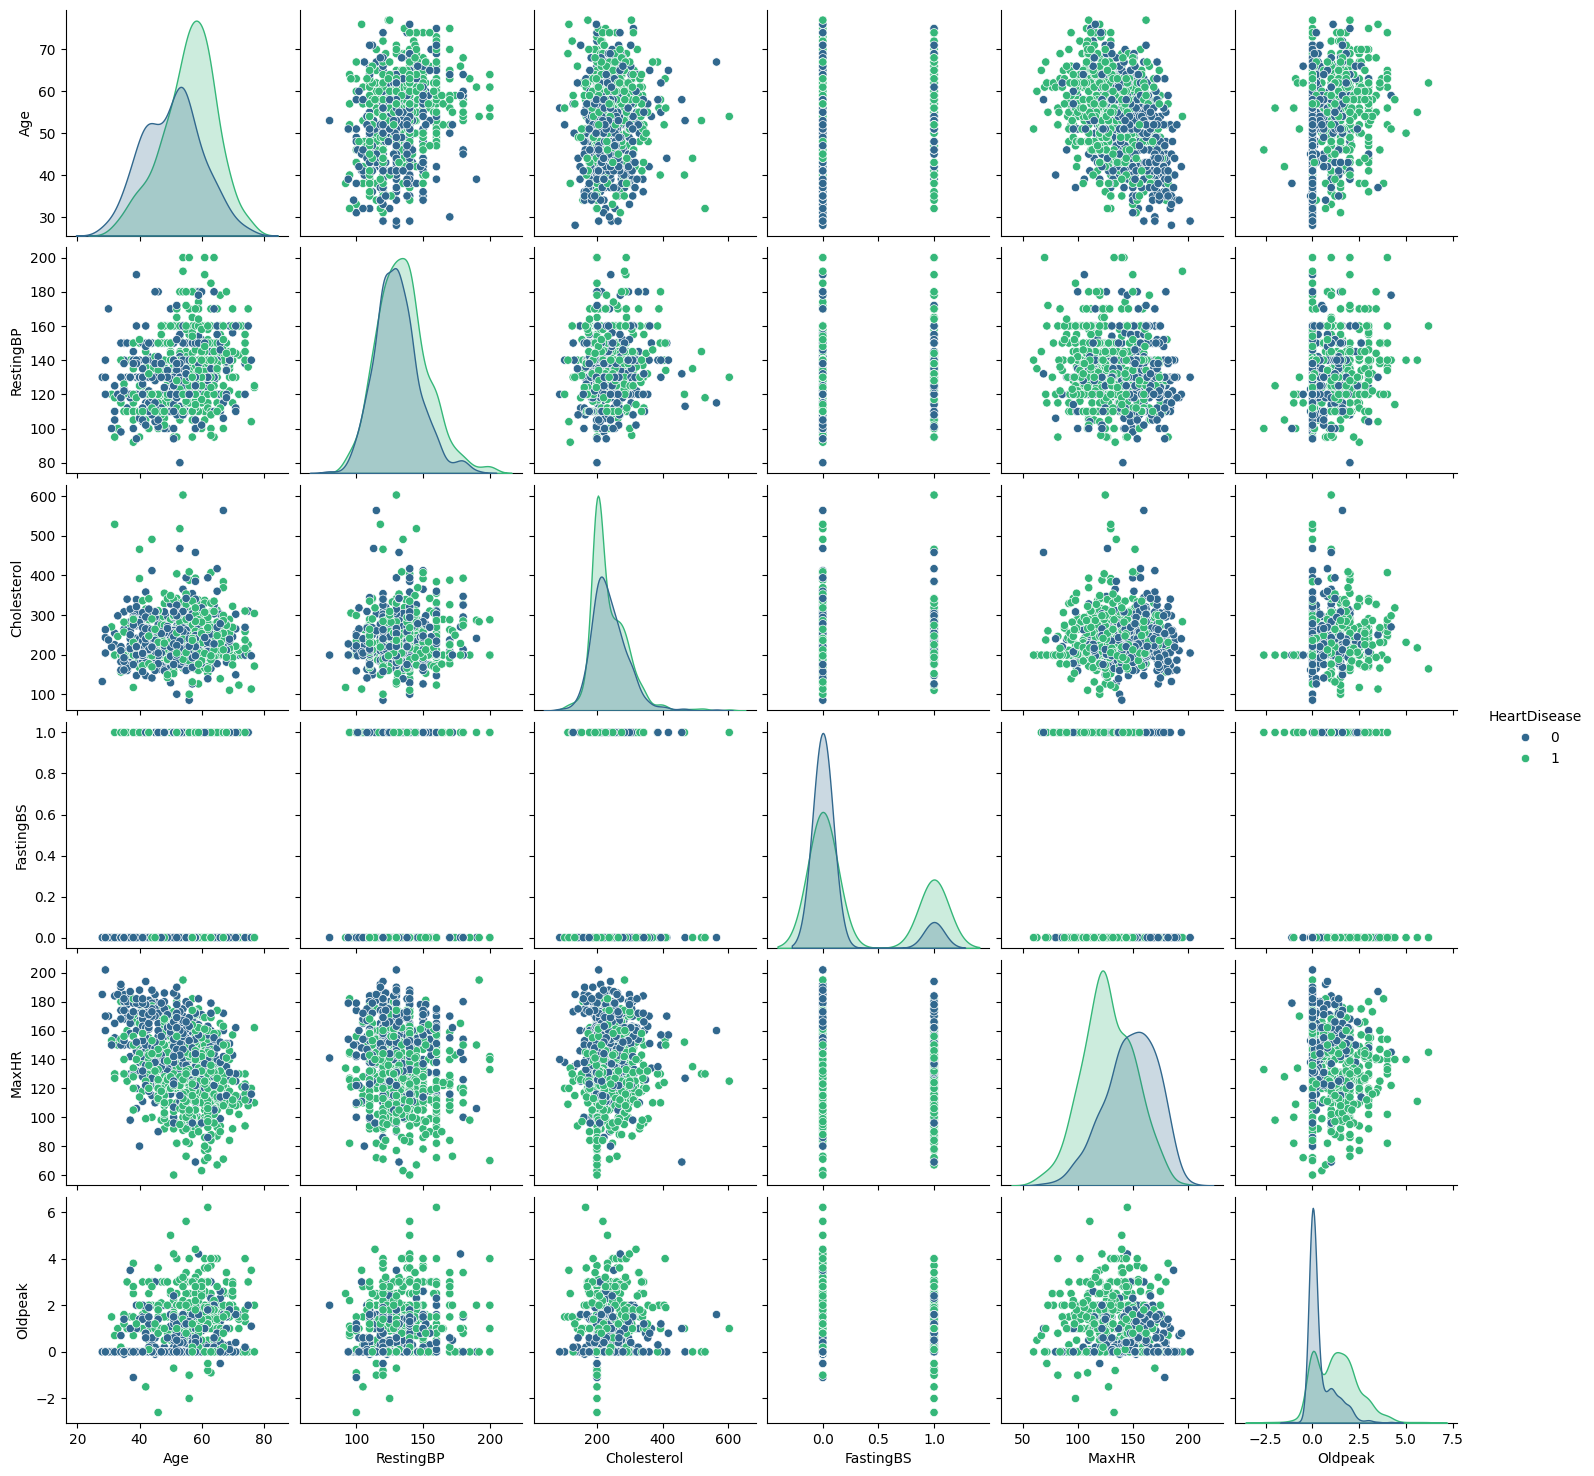

In [45]:
plt.figure(figsize=(12,8),dpi=80)
sns.pairplot(data=df_fill,hue='HeartDisease',palette='viridis')


Text(0.5, 1.0, 'Age vs Sex')

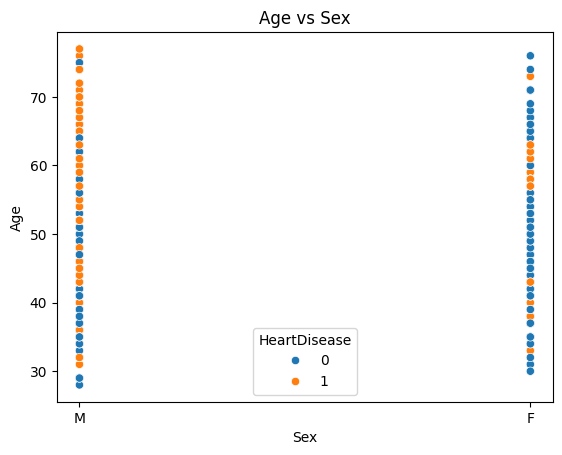

In [46]:
sns.scatterplot(y='Age',x='Sex',data=df_fill,hue='HeartDisease')
plt.title("Age vs Sex")

Text(0.5, 1.0, 'Age vs RestingBP')

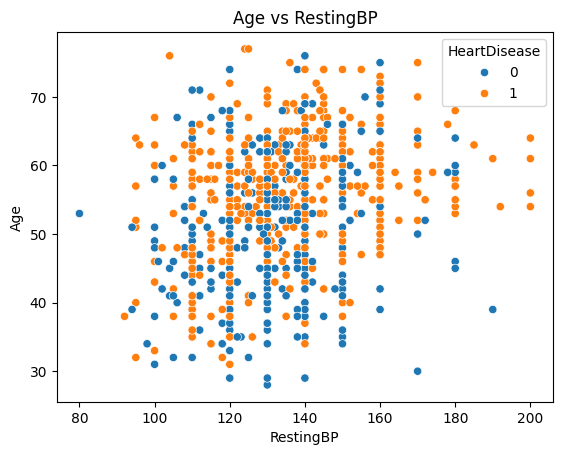

In [47]:
sns.scatterplot(x='RestingBP',y='Age',data=df_fill,hue='HeartDisease')
plt.title('Age vs RestingBP')

Text(0.5, 1.0, 'Age vs Cholesterol')

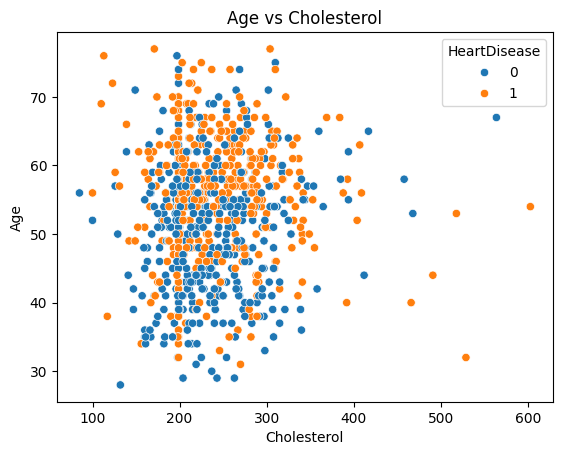

In [48]:
sns.scatterplot(x='Cholesterol',y='Age',data=df_fill,hue='HeartDisease')
plt.title('Age vs Cholesterol')

### Checking for Outliers

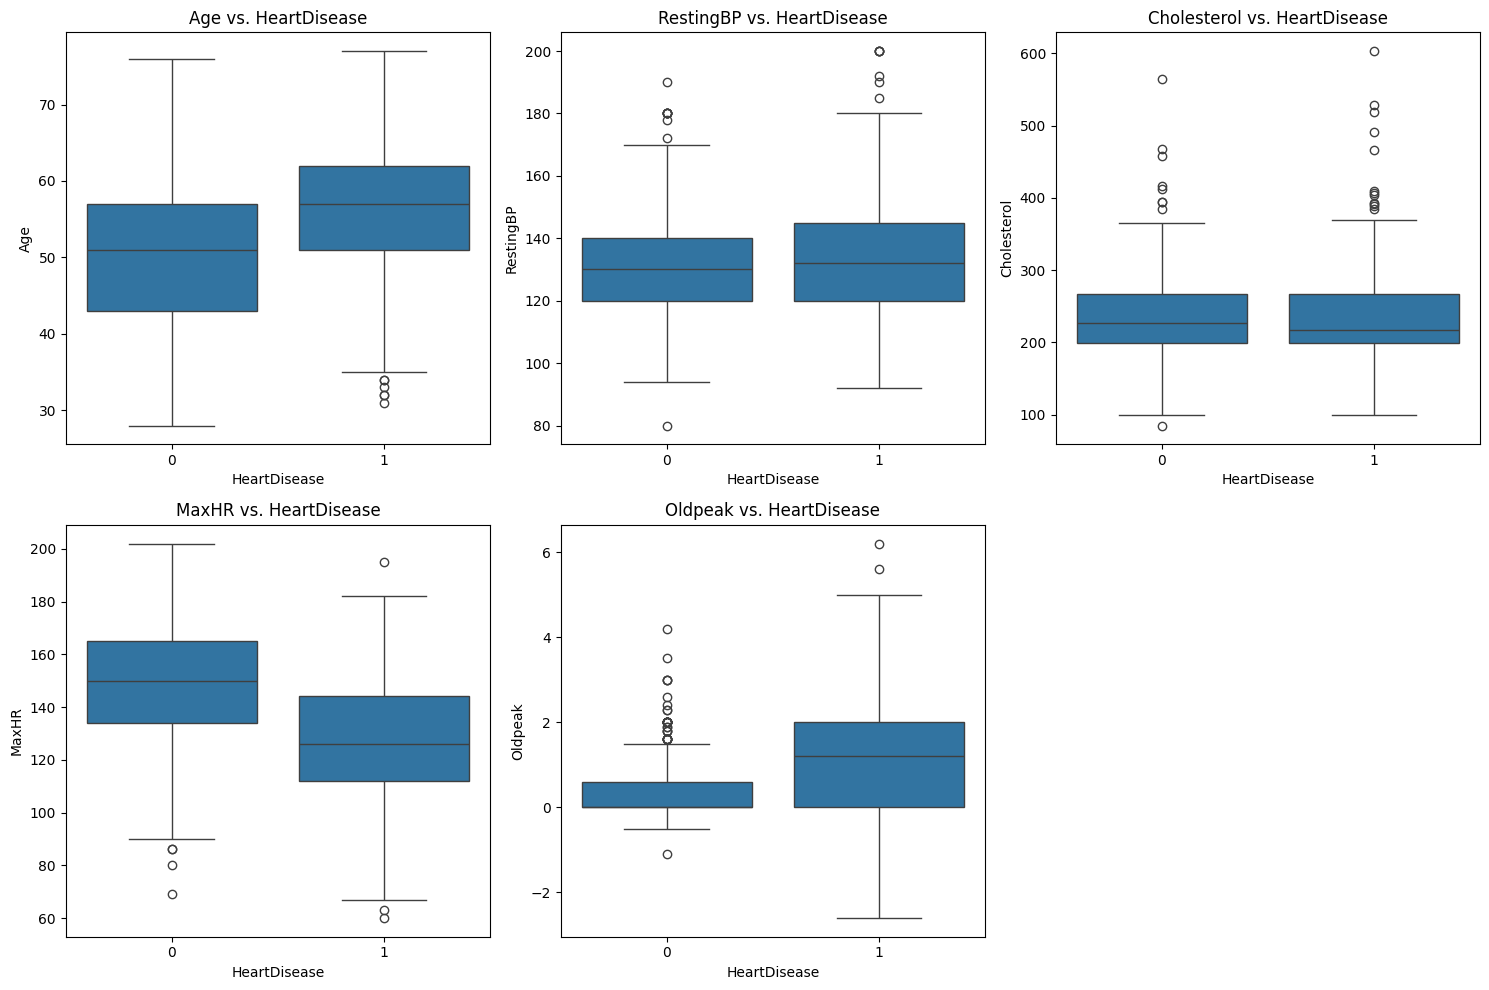

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
columns = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for i in range(2):
    for j in range(3):
        if columns:
            column = columns.pop(0)
            sns.boxplot(x='HeartDisease', y=column, data=df_fill, ax=axes[i, j])
            axes[i, j].set_title(f'{column} vs. HeartDisease')
        else:
            axes[i, j].remove()

plt.tight_layout()

### Checking Correlation

In [52]:
sns.heatmap(df_fill.corr(),annot=True)
plt.title('Correlation');

ValueError: could not convert string to float: 'M'

In [53]:
df_fill.corr()['HeartDisease'].sort_values(ascending=True)

ValueError: could not convert string to float: 'M'

In [54]:
abs(df_fill.corr()['HeartDisease']).sort_values(ascending=True)

ValueError: could not convert string to float: 'M'

In [55]:
sns.heatmap(abs(df_fill.corr()['HeartDisease']).to_frame(),annot=True)

ValueError: could not convert string to float: 'M'

In [56]:
df_dummy = pd.get_dummies(df_fill,columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

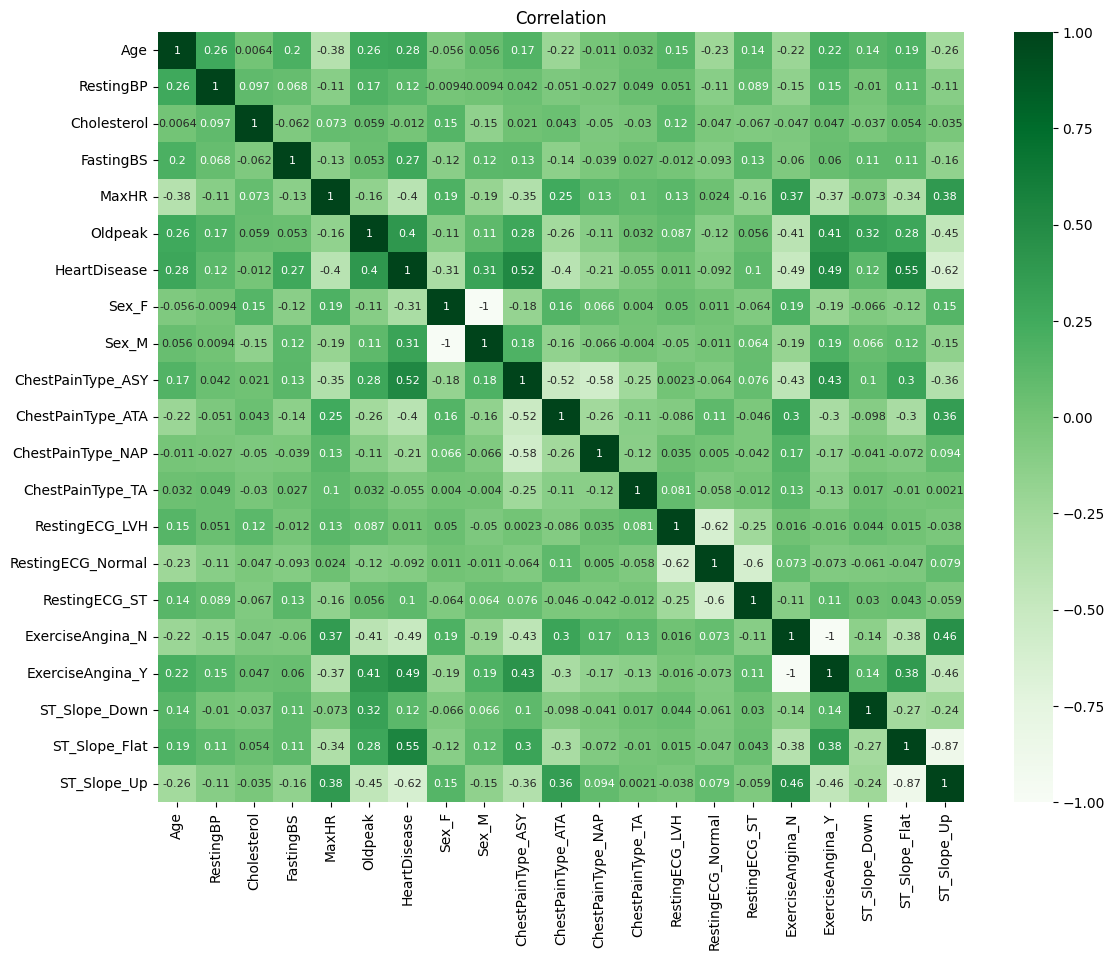

In [57]:
plt.figure(figsize=(13,10))
sns.heatmap(df_dummy.corr(), annot=True, annot_kws={"size": 8},cmap='Greens')
plt.title('Correlation');

In [58]:
df_dummy.corr()['HeartDisease'].sort_values(ascending=True)

ST_Slope_Up         -0.622164
ExerciseAngina_N    -0.494282
ChestPainType_ATA   -0.401924
MaxHR               -0.400421
Sex_F               -0.305445
ChestPainType_NAP   -0.212964
RestingECG_Normal   -0.091580
ChestPainType_TA    -0.054790
Cholesterol         -0.012340
RestingECG_LVH       0.010670
RestingECG_ST        0.102527
RestingBP            0.117930
ST_Slope_Down        0.122527
FastingBS            0.267291
Age                  0.282039
Sex_M                0.305445
Oldpeak              0.403951
ExerciseAngina_Y     0.494282
ChestPainType_ASY    0.516716
ST_Slope_Flat        0.554134
HeartDisease         1.000000
Name: HeartDisease, dtype: float64

In [59]:
abs(df_dummy.corr()['HeartDisease']).sort_values(ascending=True)

RestingECG_LVH       0.010670
Cholesterol          0.012340
ChestPainType_TA     0.054790
RestingECG_Normal    0.091580
RestingECG_ST        0.102527
RestingBP            0.117930
ST_Slope_Down        0.122527
ChestPainType_NAP    0.212964
FastingBS            0.267291
Age                  0.282039
Sex_F                0.305445
Sex_M                0.305445
MaxHR                0.400421
ChestPainType_ATA    0.401924
Oldpeak              0.403951
ExerciseAngina_N     0.494282
ExerciseAngina_Y     0.494282
ChestPainType_ASY    0.516716
ST_Slope_Flat        0.554134
ST_Slope_Up          0.622164
HeartDisease         1.000000
Name: HeartDisease, dtype: float64

Text(0.5, 1.0, 'Oldpeak vs Heartdisease')

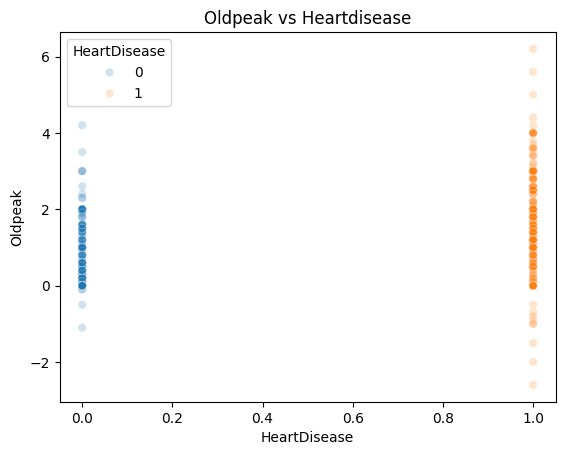

In [60]:
sns.scatterplot(x='HeartDisease',y='Oldpeak',data=df_dummy,hue='HeartDisease',alpha=0.2)
plt.title('Oldpeak vs Heartdisease')

Text(0.5, 1.0, 'Distribution of Oldpeak')

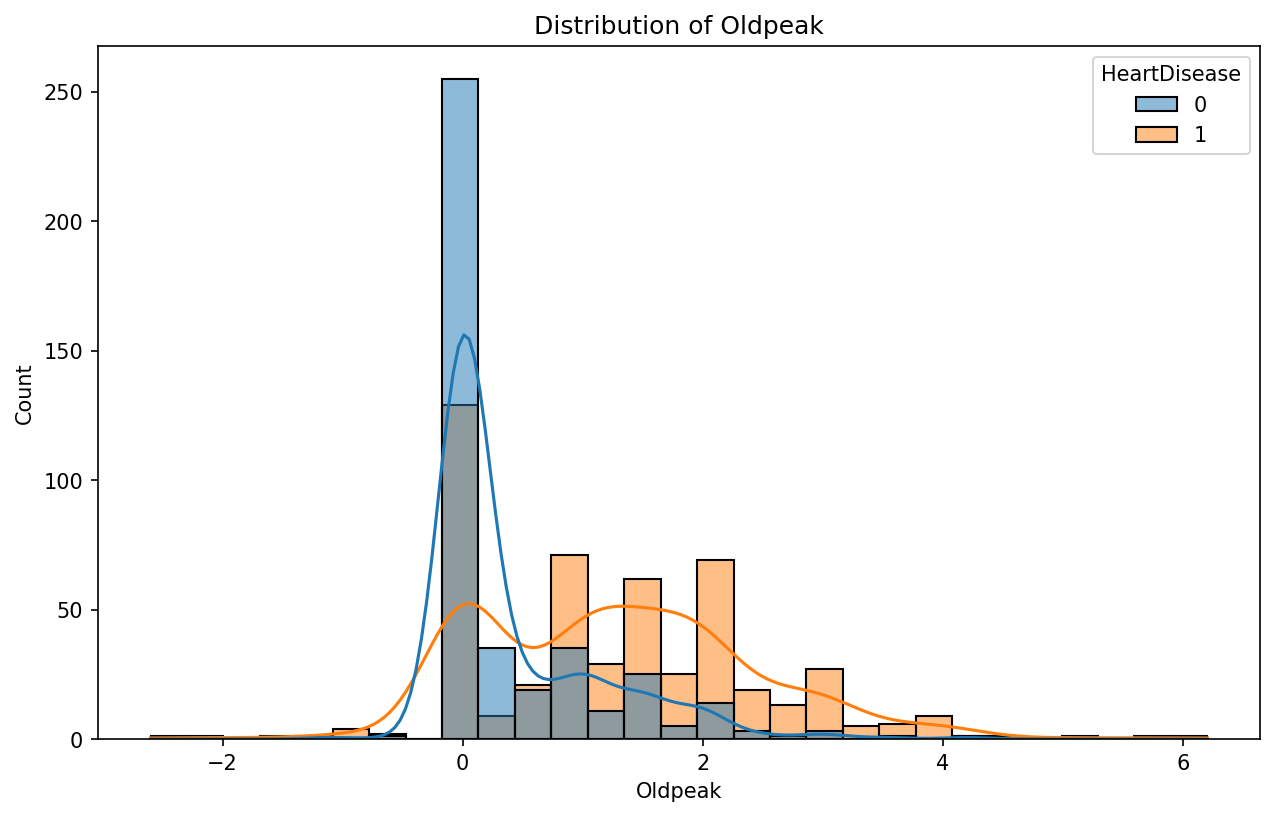

In [61]:
plt.figure(figsize=(10,6),dpi=150)
sns.histplot(x='Oldpeak',data=df_dummy,kde=True,hue='HeartDisease')
plt.title('Distribution of Oldpeak')

### **Model**

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [63]:
X = df_dummy.drop(['HeartDisease'],axis=1)
y = df_dummy['HeartDisease']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [65]:
scaler = StandardScaler()

In [66]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### K-Nearest Neighbours

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [69]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [70]:
y_pred = knn_model.predict(scaled_X_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [72]:
accuracy_score(y_test,y_pred)

0.855072463768116

In [73]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn_model, scaled_X_train, y_train, cv=5)

# Calculate mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}")

Cross-Validation Scores: [0.87596899 0.86821705 0.8515625  0.8359375  0.8125    ]
Mean Accuracy: 0.8488 +/- 0.0228


In [74]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[104,  22],
       [ 18, 132]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

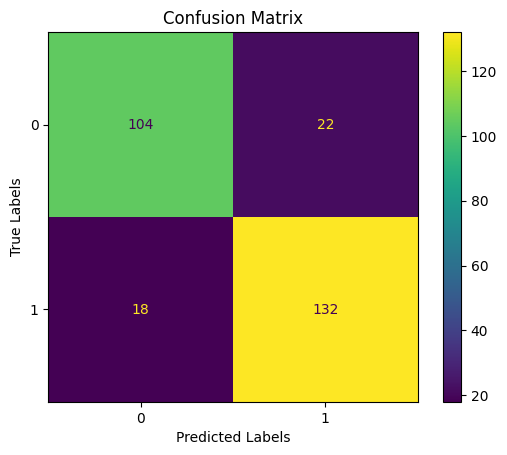

In [75]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       126
           1       0.86      0.88      0.87       150

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



In [77]:
test_error_rates = []

for n in range(1,101):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(scaled_X_train,y_train)
  y_pred = knn.predict(scaled_X_test)


  error = 1 - accuracy_score(y_test,y_pred)
  test_error_rates.append(error)

Text(0.5, 0, 'K Value')

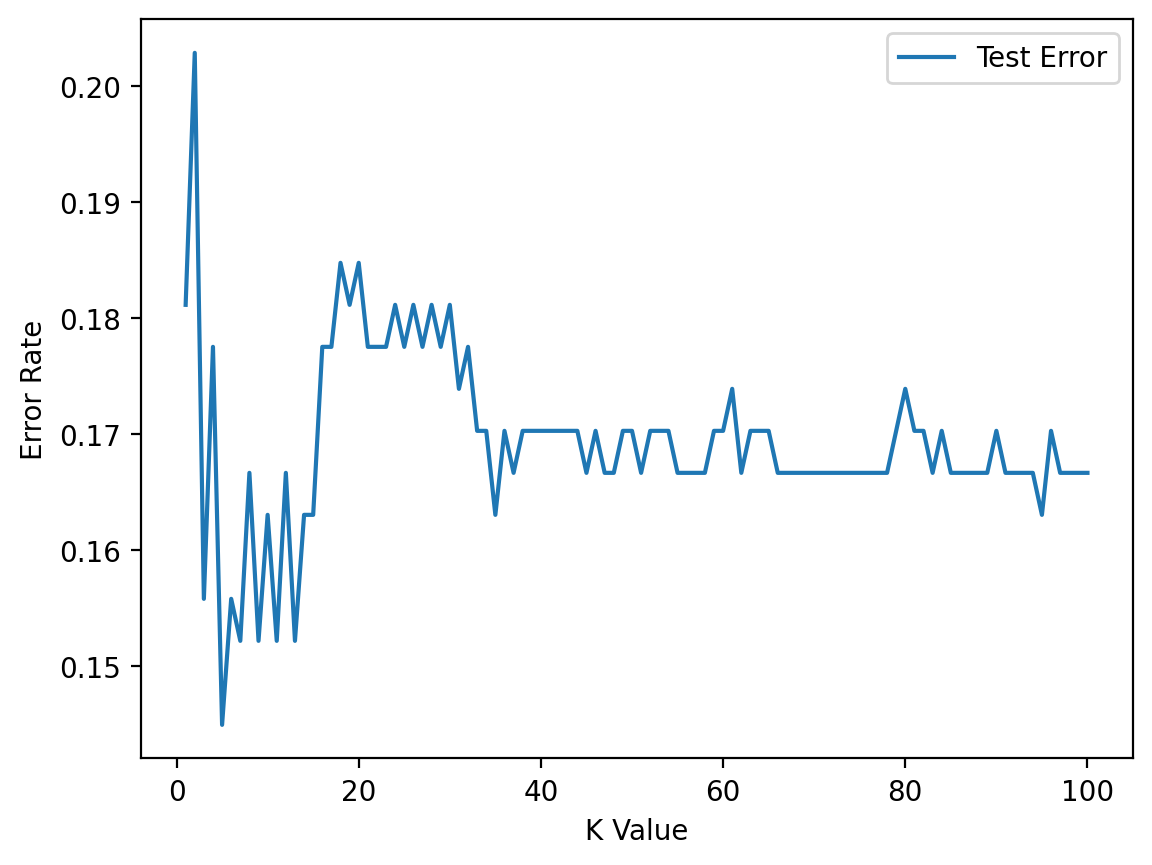

In [78]:
plt.figure(dpi=200)
plt.plot(range(1,101),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
# Define the parameters for grid search
param_grid = {
    'n_neighbors':[3, 5, 7, 9],  # Varying number of neighbors
    'weights': ['uniform', 'distance'],  # Different weighting schemes
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Different algorithms
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV object
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_knn.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [81]:
best_params = grid_knn.best_params_
best_knn = grid_knn.best_estimator_
predictions = best_knn.predict(scaled_X_test)
accuracy = accuracy_score(y_test, predictions)
print("Best Parameters:", best_params)
print('Accuracy: ', accuracy)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy:  0.8478260869565217


In [82]:
cm = confusion_matrix(y_test,predictions)
cm

array([[104,  22],
       [ 20, 130]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

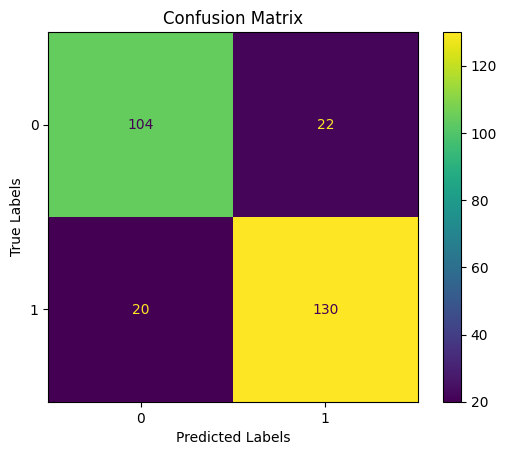

In [83]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       126
           1       0.86      0.87      0.86       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



### Decision trees

In [85]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
base_pred = model.predict(X_test)

In [87]:
cm = confusion_matrix(y_test,base_pred)
cm

array([[ 95,  31],
       [ 32, 118]], dtype=int64)

In [88]:
accuracy_score(y_test,base_pred)

0.7717391304347826

In [89]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       126
           1       0.79      0.79      0.79       150

    accuracy                           0.77       276
   macro avg       0.77      0.77      0.77       276
weighted avg       0.77      0.77      0.77       276



Text(0.5, 1.0, 'Confusion Matrix')

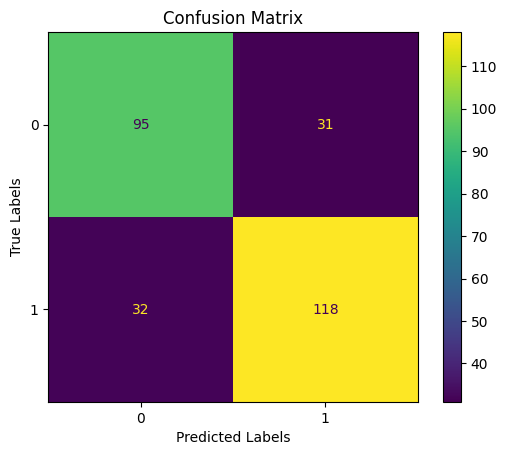

In [90]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [91]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

Feature Importance
Age                          0.037858
RestingBP                    0.079172
Cholesterol                  0.054557
FastingBS                    0.035599
MaxHR                        0.102296
Oldpeak                      0.067448
Sex_F                        0.036046
Sex_M                        0.005714
ChestPainType_ASY            0.097449
ChestPainType_ATA            0.000000
ChestPainType_NAP            0.012779
ChestPainType_TA             0.000482
RestingECG_LVH               0.001910
RestingECG_Normal            0.003157
RestingECG_ST                0.005338
ExerciseAngina_N             0.004210
ExerciseAngina_Y             0.033958
ST_Slope_Down                0.009545
ST_Slope_Flat                0.004210
ST_Slope_Up                  0.408272

In [92]:
tree_classifier = DecisionTreeClassifier()

# Define the hyperparameters grid for grid search
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Varying maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15],  # Varying min samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6]  # Varying min samples required at each leaf node
}
# Create a GridSearchCV object
grid_tree = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='accuracy')
# Fit the grid search to the data
grid_tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [93]:
best_params = grid_tree.best_params_
best_dt = grid_tree.best_estimator_
predictions = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Best Parameters:", best_params)
print('Accuracy: ', accuracy)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy:  0.8442028985507246


In [94]:
cm = confusion_matrix(y_test,predictions)
cm

array([[109,  17],
       [ 26, 124]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

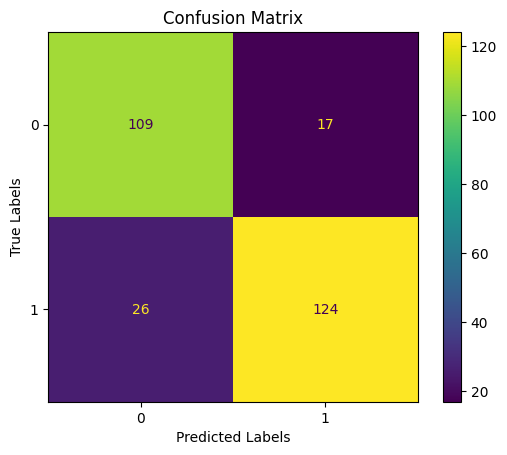

In [95]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [96]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       126
           1       0.88      0.83      0.85       150

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.84       276



### Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=54)
model.fit(X_train,y_train)

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [ ]:
preds = model.predict(X_test)

In [98]:
accuracy_score(y_test,preds)

NameError: name 'preds' is not defined

In [99]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto',random_state=54)
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

ValueError: x and y must have same first dimension, but have shapes (39,) and (0,)

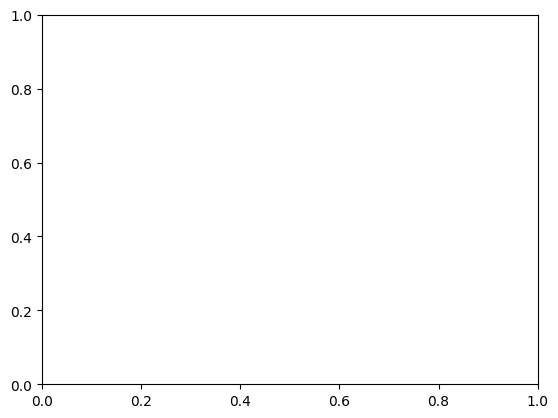

In [100]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [ ]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()
plt.xlim(1,20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=8,max_features='auto',random_state=54)
model.fit(X_train,y_train)

In [101]:
preds = model.predict(X_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
accuracy_score(y_test,preds)

In [102]:
cm = confusion_matrix(y_test,preds)
cm

NameError: name 'preds' is not defined

Text(0.5, 1.0, 'Confusion Matrix')

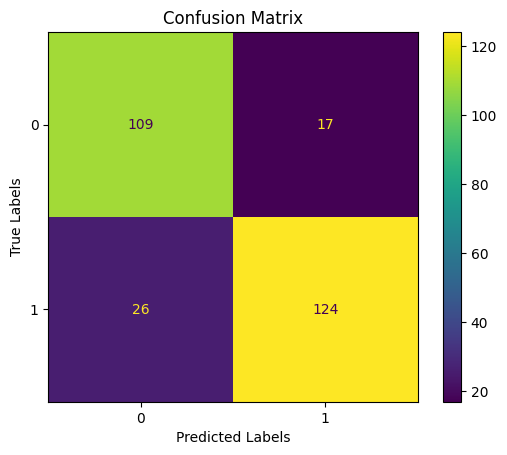

In [103]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [104]:
print(classification_report(y_test,preds))

NameError: name 'preds' is not defined

In [105]:
n_estimators = [64,100,128,200]
max_features = ['auto', 'sqrt', 'log2']
bootstrap = [True, False]
oob_score = [True, False]

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score,
     'random_state': [54]
}

rfc = RandomForestClassifier()
grid_forest = GridSearchCV(rfc,param_grid)


grid_forest.fit(X_train,y_train)

C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_para

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False], 'random_state': [54]})

In [106]:
predictions = grid_forest.predict(X_test)

In [107]:
accuracy_score(y_test,predictions)

0.8442028985507246

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       126
           1       0.86      0.85      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [109]:
cm = confusion_matrix(y_test,predictions)
cm

array([[105,  21],
       [ 22, 128]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

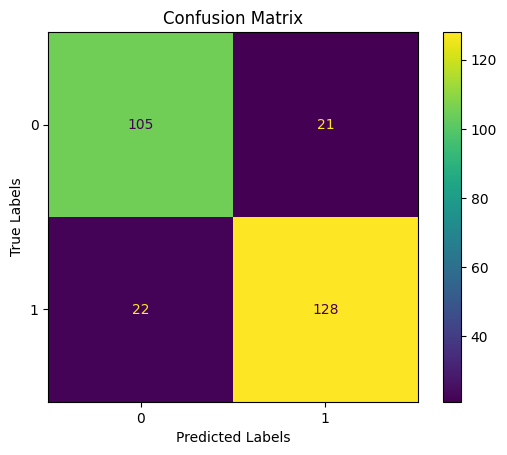

In [110]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [111]:
best_params = grid_forest.best_params_
best_rf = grid_forest.best_estimator_
predictions = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Best Parameters:", best_params)
print('Accuracy: ', accuracy)


Best Parameters: {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 100, 'oob_score': False, 'random_state': 54}
Accuracy:  0.8442028985507246


### Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
log_model = LogisticRegression()

In [156]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [157]:
y_pred = log_model.predict(scaled_X_test)

In [158]:
accuracy_score(y_test,y_pred)

0.8478260869565217

In [159]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[68,  9],
       [19, 88]], dtype=int64)

In [160]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Text(0.5, 1.0, 'Confusion Matrix')

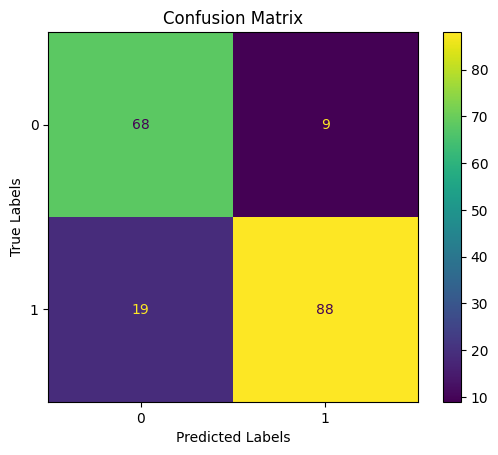

In [161]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [162]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength

    'solver': ['liblinear', 'saga']  # Algorithm to use in optimization problem
}

logistic = LogisticRegression(max_iter=10000)

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.842391304347826


In [163]:
cm = confusion_matrix(y_test,predictions)
cm

array([[68,  9],
       [20, 87]], dtype=int64)

In [164]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



Text(0.5, 1.0, 'Confusion Matrix')

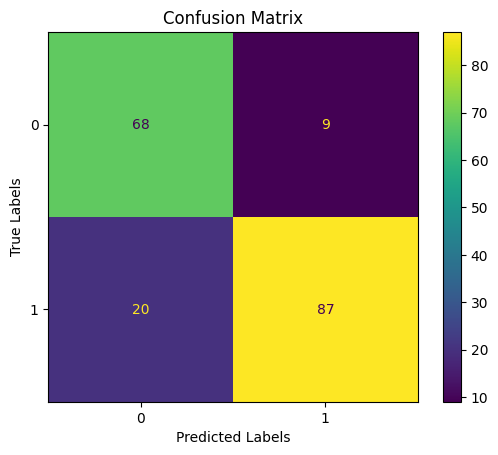

In [165]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

Plot precision recall curve to see how well the positives are correctly classified

In [166]:
from sklearn.metrics import precision_recall_curve

Text(0.5, 1.0, 'Precision-Recall curve for HeartDisease present')

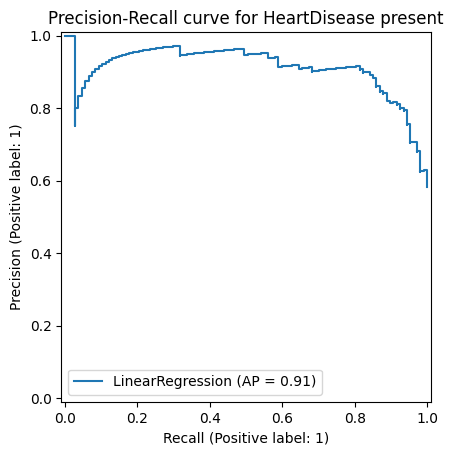

In [167]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, name="LinearRegression")
display.ax_.set_title("Precision-Recall curve for HeartDisease present")

Identifying positive class(1) while avoiding misclassification of negative class(0) using ROC(Receiver Operating Characteristic Curve)

In [168]:
from sklearn.metrics import RocCurveDisplay

Text(0.5, 1.0, 'ROC Curve for HeartDisease-present')

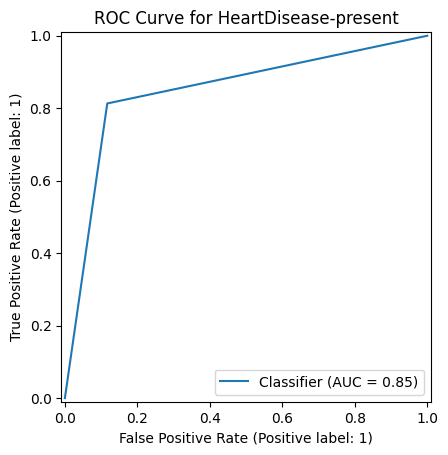

In [169]:
RocCurveDisplay.from_predictions(y_test, predictions)
plt.title('ROC Curve for HeartDisease-present')

Accuracy: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



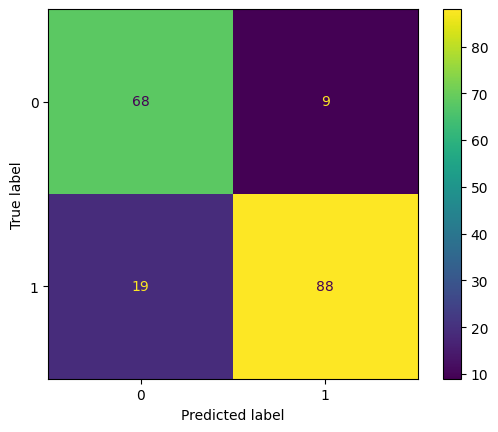

In [170]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Assuming 'X' and 'y' are your feature matrix and target variable

# Check for non-numeric columns and encode them if needed
for col in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=10000)
log_model.fit(scaled_X_train, y_train)

# Make predictions and calculate accuracy
y_pred = log_model.predict(scaled_X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


Accuracy: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Model saved as C:\Users\Bhoomika\Desktop\logreg_model_high_accuracy.pkl


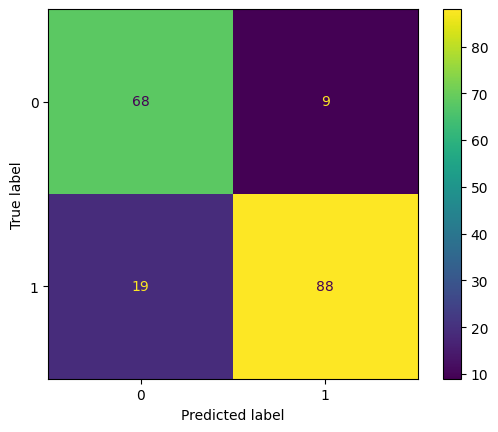

In [171]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Assuming 'X' and 'y' are your feature matrix and target variable

# Check for non-numeric columns and encode them if needed
for col in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=10000)
log_model.fit(scaled_X_train, y_train)

# Make predictions and calculate accuracy
y_pred = log_model.predict(scaled_X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Save the model to a .pkl file on your desktop
model_filename = r'C:\Users\Bhoomika\Desktop\logreg_model_high_accuracy.pkl'
joblib.dump(log_model, model_filename)
print(f"Model saved as {model_filename}")


In [172]:
# Coefficients of the model
coefficients = log_model.coef_[0]
features = X.columns
coef_df = pd.DataFrame(list(zip(features, coefficients)), columns=['Feature', 'Coefficient'])
print(coef_df)


           Feature  Coefficient
0              Age     0.138855
1              Sex     0.497190
2    ChestPainType    -0.565943
3        RestingBP     0.064559
4      Cholesterol    -0.493395
5        FastingBS     0.404029
6       RestingECG    -0.174062
7            MaxHR    -0.200766
8   ExerciseAngina     0.626233
9          Oldpeak     0.483624
10        ST_Slope    -1.009281


In [173]:
import numpy as np

# Calculate odds ratios
odds_ratios = np.exp(coefficients)
odds_ratio_df = pd.DataFrame(list(zip(features, odds_ratios)), columns=['Feature', 'Odds Ratio'])
print(odds_ratio_df)


           Feature  Odds Ratio
0              Age    1.148958
1              Sex    1.644094
2    ChestPainType    0.567825
3        RestingBP    1.066688
4      Cholesterol    0.610550
5        FastingBS    1.497847
6       RestingECG    0.840245
7            MaxHR    0.818104
8   ExerciseAngina    1.870551
9          Oldpeak    1.621941
10        ST_Slope    0.364481


In [174]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME
explainer = LimeTabularExplainer(
    training_data=scaled_X_train, 
    feature_names=X.columns, 
    class_names=[str(i) for i in y.unique()],
    mode='classification'
)

# Select an instance to explain
instance_idx = 0  # You can choose any row index
exp = explainer.explain_instance(scaled_X_test[instance_idx], log_model.predict_proba)

# Show explanation for the selected instance
exp.show_in_notebook()


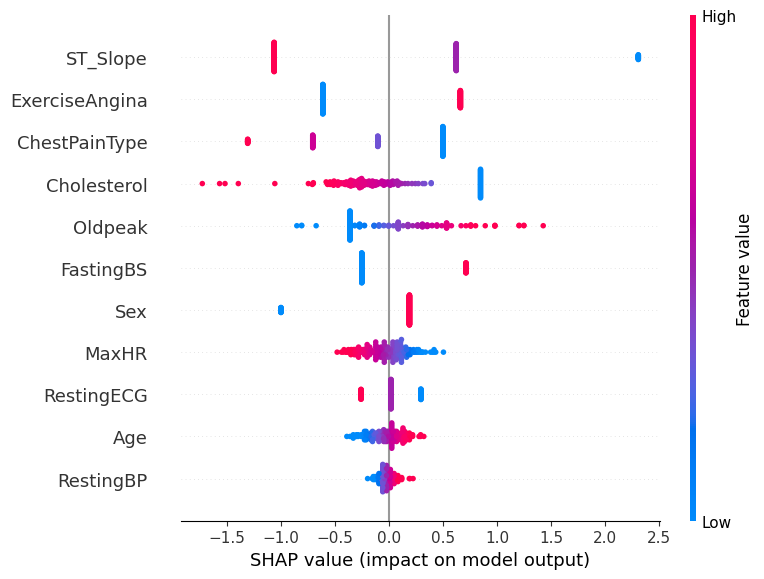

In [175]:
import shap

# Initialize SHAP explainer for logistic regression
explainer = shap.LinearExplainer(log_model, scaled_X_train)

# Get SHAP values for the test set
shap_values = explainer.shap_values(scaled_X_test)

# Visualize the SHAP summary plot for both classes
shap.summary_plot(shap_values, scaled_X_test, feature_names=X.columns)


Accuracy: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



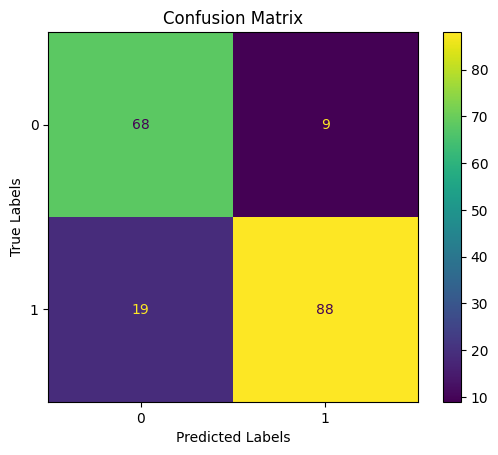

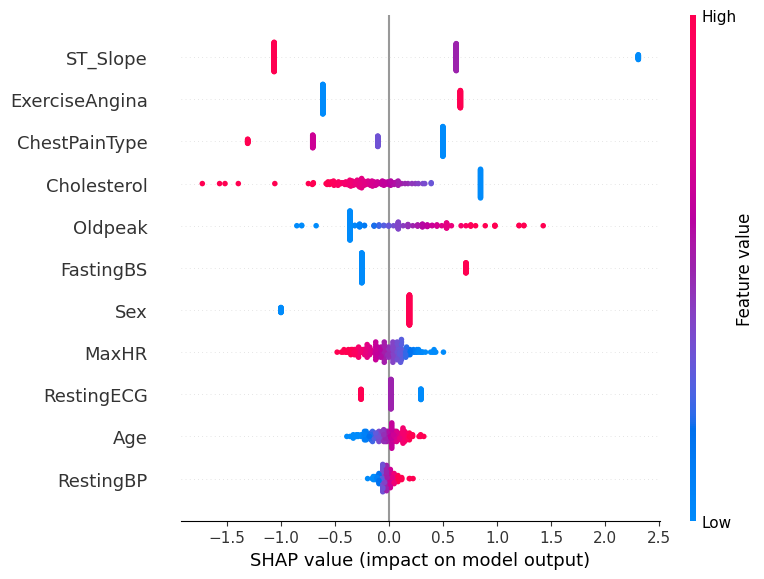

Global Explanation:

    The SHAP summary plot highlights the global feature importance:
    1. Top Features: The most impactful features are:
       - ST_Slope, ExerciseAngina, ChestPainType.
    2. Least Impactful Features: The features with minimal influence are:
       - RestingECG, Age, RestingBP.
    These features collectively define the model's predictive behavior globally.
    

Local Explanation:

    The SHAP force plot explains the local prediction for a specific instance:
    1. Positive Contributions:
       - Features that pushed the prediction towards the positive class include:
         .
    2. Negative Contributions:
       - Features that pulled the prediction towards the negative class include:
         ST_Slope (impact: -1.06), Sex (impact: -1.00), ExerciseAngina (impact: -0.61).
    


In [176]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load your dataset (replace with your dataset)
# df = pd.read_csv('your_dataset.csv')
# X = df.drop('target', axis=1)  # Assuming target column is 'target'
# y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data (if needed)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=10000)
log_model.fit(scaled_X_train, y_train)

# Predictions and accuracy
y_pred = log_model.predict(scaled_X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model
joblib.dump(log_model, 'logreg_model.pkl')

# Explain the model with SHAP
explainer = shap.Explainer(log_model, scaled_X_train)
shap_values = explainer(scaled_X_test)

# Global Explanation: SHAP Summary Plot
shap.summary_plot(shap_values, scaled_X_test, feature_names=X.columns)

# Local Explanation: SHAP Force Plot for a Single Prediction
shap.initjs()  # Initialize SHAP visualizations
shap.force_plot(shap_values[0].base_values, shap_values[0].values, features=scaled_X_test[0], feature_names=X.columns)

# Dynamic Text Generator for SHAP
def generate_shap_text(shap_values, X, feature_names):
    # Global Explanation
    importance = np.abs(shap_values.values).mean(axis=0)
    sorted_idx = np.argsort(-importance)
    top_features = feature_names[sorted_idx][:3]
    least_features = feature_names[sorted_idx][-3:]
    
    global_text = f"""
    The SHAP summary plot highlights the global feature importance:
    1. Top Features: The most impactful features are:
       - {', '.join(f"{feature}" for feature in top_features)}.
    2. Least Impactful Features: The features with minimal influence are:
       - {', '.join(f"{feature}" for feature in least_features)}.
    These features collectively define the model's predictive behavior globally.
    """
    
    # Local Explanation
    single_idx = 0  # Index of the single instance for explanation
    local_shap = shap_values[single_idx]
    contributing_features = np.argsort(-np.abs(local_shap.values))
    top_contributing_features = contributing_features[:3]
    
    local_text = f"""
    The SHAP force plot explains the local prediction for a specific instance:
    1. Positive Contributions:
       - Features that pushed the prediction towards the positive class include:
         {', '.join(f"{feature_names[i]} (impact: {local_shap.values[i]:.2f})" for i in top_contributing_features if local_shap.values[i] > 0)}.
    2. Negative Contributions:
       - Features that pulled the prediction towards the negative class include:
         {', '.join(f"{feature_names[i]} (impact: {local_shap.values[i]:.2f})" for i in top_contributing_features if local_shap.values[i] < 0)}.
    """
    
    return global_text, local_text

# Generate and print the SHAP explanations
global_shap_text, local_shap_text = generate_shap_text(shap_values, scaled_X_test, X.columns)
print("Global Explanation:")
print(global_shap_text)
print("\nLocal Explanation:")
print(local_shap_text)


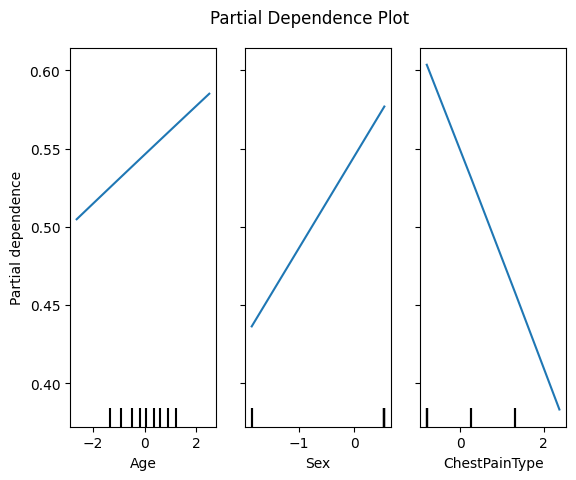

The Partial Dependence Plot (PDP) illustrates how the selected features influence the predicted outcomes of the model while marginalizing over other features.

Key insights:
- Age: The PDP shows how changes in this feature impact predictions. For instance, higher values might correlate with an increase or decrease in the predicted probability depending on the observed curve trends.
- Sex: The PDP shows how changes in this feature impact predictions. For instance, higher values might correlate with an increase or decrease in the predicted probability depending on the observed curve trends.
- ChestPainType: The PDP shows how changes in this feature impact predictions. For instance, higher values might correlate with an increase or decrease in the predicted probability depending on the observed curve trends.

These plots provide actionable insights into the relationship between each feature and the target variable, allowing for more informed decision-making and feature analysis.


In [177]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Specify the features you want to analyze (for example, features [0, 1, 2])
features = [0, 1, 2]

# Generate the Partial Dependence Plot
disp = PartialDependenceDisplay.from_estimator(
    log_model, 
    X=scaled_X_train,  # Use the scaled training data directly
    features=features, 
    feature_names=X.columns
)

# Customize the plot
plt.suptitle('Partial Dependence Plot')
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.show()

# Dynamic Text Generator for PDP
def generate_pdp_text(features, X_columns):
    # Start description
    description = "The Partial Dependence Plot (PDP) illustrates how the selected features influence the predicted outcomes of the model while marginalizing over other features.\n\n"
    description += "Key insights:\n"
    
    # Add feature-specific descriptions
    for feature_idx in features:
        feature_name = X_columns[feature_idx]
        description += f"- {feature_name}: The PDP shows how changes in this feature impact predictions. "
        description += "For instance, higher values might correlate with an increase or decrease in the predicted probability depending on the observed curve trends.\n"

    description += "\nThese plots provide actionable insights into the relationship between each feature and the target variable, allowing for more informed decision-making and feature analysis."
    return description

# Generate and display the PDP text description
pdp_text = generate_pdp_text(features, X.columns)
print(pdp_text)


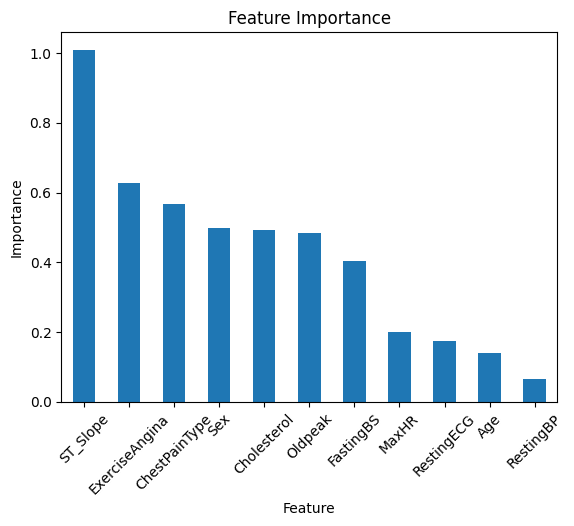


    Feature Importance Analysis
    
    1. Overview:
    The feature importance analysis provides insights into the impact of various features on the model's predictions. 
    As seen in the visualization, the importance scores vary significantly, highlighting key contributors and less impactful variables.
    
    2. Key Findings:
    - Most Influential Feature:
      The feature 'ST_Slope' stands out with the highest importance score of 1.01. 
      Its substantial influence suggests it plays a critical role in the model's decisions.
    
    - Least Influential Feature:
      In contrast, 'RestingBP' has the lowest importance score of 0.06, 
      indicating minimal contribution to the predictions.
      
    - Range of Influence:
      The difference in importance between the top and least influential features is **0.94**, 
      underscoring the diversity in feature relevance.
    
   3. Detailed Insights:
    - Top 3 Features:
      These features contribute most significantly 

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from the Logistic Regression coefficients
feature_importance = np.abs(log_model.coef_[0])

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

def enhanced_feature_importance_text(importance_df):
    # Get the most and least important features
    most_important = importance_df.iloc[0]
    least_important = importance_df.iloc[-1]
    
    # Get the top and bottom 3 features for additional insights
    top_features = importance_df.head(3)
    bottom_features = importance_df.tail(3)
    
    # Calculate the range and contrast between the most and least important features
    range_contrast = most_important['Importance'] - least_important['Importance']
    
    # Construct the enhanced dynamic text
    description = f"""
    Feature Importance Analysis
    
    1. Overview:
    The feature importance analysis provides insights into the impact of various features on the model's predictions. 
    As seen in the visualization, the importance scores vary significantly, highlighting key contributors and less impactful variables.
    
    2. Key Findings:
    - Most Influential Feature:
      The feature '{most_important['Feature']}' stands out with the highest importance score of {most_important['Importance']:.2f}. 
      Its substantial influence suggests it plays a critical role in the model's decisions.
    
    - Least Influential Feature:
      In contrast, '{least_important['Feature']}' has the lowest importance score of {least_important['Importance']:.2f}, 
      indicating minimal contribution to the predictions.
      
    - Range of Influence:
      The difference in importance between the top and least influential features is **{range_contrast:.2f}**, 
      underscoring the diversity in feature relevance.
    
   3. Detailed Insights:
    - Top 3 Features:
      These features contribute most significantly to the predictions:
      {', '.join(f"'{row['Feature']}' (importance: {row['Importance']:.2f})" for _, row in top_features.iterrows())}.
    
    - Bottom 3 Features:
      These have the least impact on the model's performance:
      {', '.join(f"'{row['Feature']}' (importance: {row['Importance']:.2f})" for _, row in bottom_features.iterrows())}.
      
    4. Recommendations:
    - Consider prioritizing the top features in further analysis or feature engineering.
    - Reassess the utility of the least impactful features; they could be candidates for removal or transformation.
    - Explore feature interactions to determine whether the less important features contribute indirectly.
    
   
    """
    return description

# Generate and display the enhanced description
enhanced_text = enhanced_feature_importance_text(importance_df)
print(enhanced_text)

    



### 

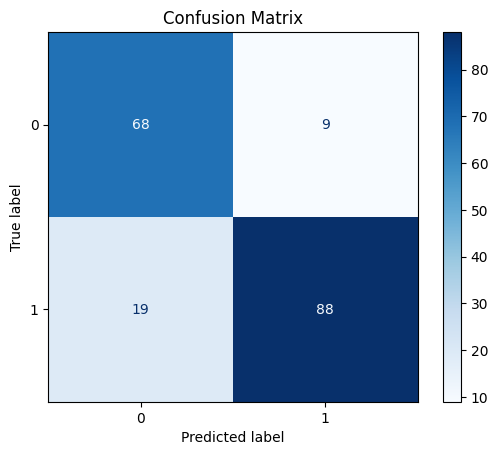

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [179]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Print classification report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Model saved as C:\Users\Bhoomika\Desktop\logreg_model_high_accuracy.pkl


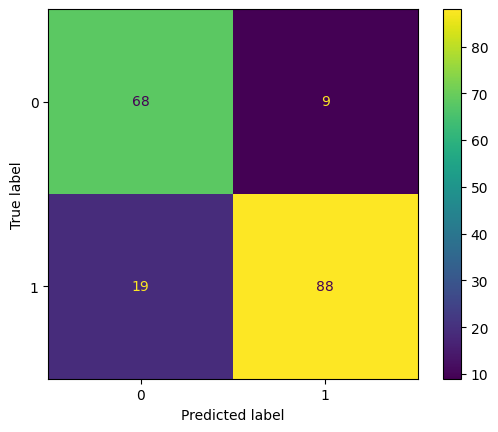

In [180]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Step 1: Load your dataset
df = pd.read_csv(r'C:\Users\Bhoomika\heart.csv')  # Replace with your actual dataset file path

# Step 2: Define 'X' and 'y'
# X: Feature matrix (all columns except the target column)
# y: Target variable (the column you're trying to predict)
X = df.drop('HeartDisease', axis=1)  # 'HeartDisease' is the target column
y = df['HeartDisease']  # 'HeartDisease' is the target column

# Step 3: Check for non-numeric columns and encode them if needed
for col in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardizing the data (feature scaling)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Step 6: Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=10000)
log_model.fit(scaled_X_train, y_train)

# Step 7: Make predictions and calculate accuracy
y_pred = log_model.predict(scaled_X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 8: Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Step 9: Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Step 10: Save the trained model to a .pkl file using pickle
model_filename = r'C:\Users\Bhoomika\Desktop\logreg_model_high_accuracy.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(log_model, f)
print(f"Model saved as {model_filename}")


In [181]:
import pandas as pd
data = pd.read_csv(r"D:\heartp\heart.csv")  # Replace with your dataset
features = list(data.columns)
features.remove("HeartDisease")  # Replace with your target column name
print(features)


['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


From the above results, we can choose the model based on the required application:


1. For predicting more positive cases we can choose the KNN model as it offers the best recall
2.  For having a more balanced approach and more overall accuracy, we can choose Logistic regression model



In [182]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding for each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())


   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [183]:
# Convert all columns to numeric (force conversion if needed)
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df.dropna(inplace=True)


In [184]:
import pickle

# Check if every column in the dataframe is picklable
for col in df_fill.columns:
    try:
        pickle.dumps(df_fill[col])
    except Exception as e:
        print(f"Column {col} is not picklable: {e}")


In [185]:
import multiprocessing

# Set the start method to 'spawn' to avoid issues with forking (particularly on Windows/macOS)
multiprocessing.set_start_method('spawn', force=True)


In [187]:
from ctgan import CTGAN

# Correctly set generator_dim and discriminator_dim as lists of integers
ctgan = CTGAN(
    epochs=10, 
    batch_size=32, 
    generator_dim=[64],  # List of integers specifying layer dimensions
    discriminator_dim=[64]  # List of integers specifying layer dimensions
)

# Fit the model
ctgan.fit(df_fill)


ImportError: cannot import name 'inf' from 'torch' (unknown location)

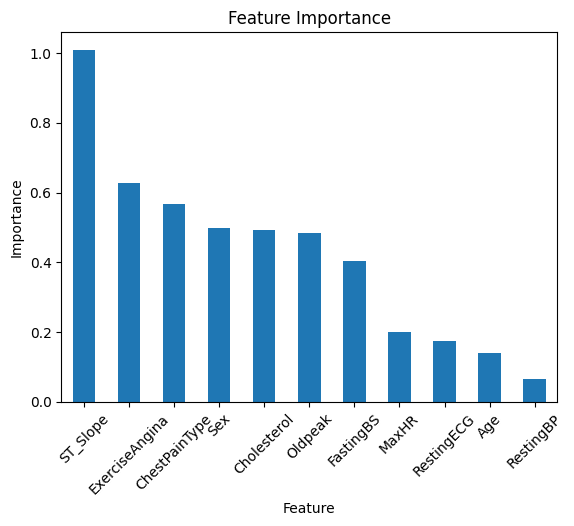


    Feature Importance Analysis
    
    1. Overview:
    The feature importance analysis provides insights into the impact of various features on the model's predictions. 
    As seen in the visualization, the importance scores vary significantly, highlighting key contributors and less impactful variables.
    
    2. Key Findings:
    - Most Influential Feature:
      The feature 'ST_Slope' stands out with the highest importance score of 1.01. 
      Its substantial influence suggests it plays a critical role in the model's decisions.
    
    - Least Influential Feature:
      In contrast, 'RestingBP' has the lowest importance score of 0.06, 
      indicating minimal contribution to the predictions.
      
    - Range of Influence:
      The difference in importance between the top and least influential features is **0.94**, 
      underscoring the diversity in feature relevance.
    
   3. Detailed Insights:
    - Top 3 Features:
      These features contribute most significantly 

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from the Logistic Regression coefficients
feature_importance = np.abs(log_model.coef_[0])

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

def enhanced_feature_importance_text(importance_df):
    # Get the most and least important features
    most_important = importance_df.iloc[0]
    least_important = importance_df.iloc[-1]
    
    # Get the top and bottom 3 features for additional insights
    top_features = importance_df.head(3)
    bottom_features = importance_df.tail(3)
    
    # Calculate the range and contrast between the most and least important features
    range_contrast = most_important['Importance'] - least_important['Importance']
    
    # Construct the enhanced dynamic text
    description = f"""
    Feature Importance Analysis
    
    1. Overview:
    The feature importance analysis provides insights into the impact of various features on the model's predictions. 
    As seen in the visualization, the importance scores vary significantly, highlighting key contributors and less impactful variables.
    
    2. Key Findings:
    - Most Influential Feature:
      The feature '{most_important['Feature']}' stands out with the highest importance score of {most_important['Importance']:.2f}. 
      Its substantial influence suggests it plays a critical role in the model's decisions.
    
    - Least Influential Feature:
      In contrast, '{least_important['Feature']}' has the lowest importance score of {least_important['Importance']:.2f}, 
      indicating minimal contribution to the predictions.
      
    - Range of Influence:
      The difference in importance between the top and least influential features is **{range_contrast:.2f}**, 
      underscoring the diversity in feature relevance.
    
   3. Detailed Insights:
    - Top 3 Features:
      These features contribute most significantly to the predictions:
      {', '.join(f"'{row['Feature']}' (importance: {row['Importance']:.2f})" for _, row in top_features.iterrows())}.
    
    - Bottom 3 Features:
      These have the least impact on the model's performance:
      {', '.join(f"'{row['Feature']}' (importance: {row['Importance']:.2f})" for _, row in bottom_features.iterrows())}.
      
    4. Recommendations:
    - Consider prioritizing the top features in further analysis or feature engineering.
    - Reassess the utility of the least impactful features; they could be candidates for removal or transformation.
    - Explore feature interactions to determine whether the less important features contribute indirectly.
    
   
    """
    return description

# Generate and display the enhanced description
enhanced_text = enhanced_feature_importance_text(importance_df)
print(enhanced_text)

    



In [1]:
from transformers import pipeline

# Initialize the text generation pipeline using GPT-2
generator = pipeline("text-generation", model="gpt2")

# Input prompt for the text generation
prompt = "Once upon a time"

# Generate text based on the prompt
generated_text = generator(prompt, max_length=100, num_return_sequences=1)

# Print the generated text
print(generated_text[0]['generated_text'])


C:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Python311\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Bhoomika\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-u

Once upon a time it was a small country. There were no buildings that weren't lined down by fences; the land around them belonged entirely to the city. No monuments or buildings were to be found in the ruins: the only real buildings in that place were ruins of their former towns; few houses were made of timber or stone; there were no rivers and glaciers under the trees; no bridges, no schools; and no civilization of any kind left here. The roads continued their journeys across the countryside


Device set to use cpu


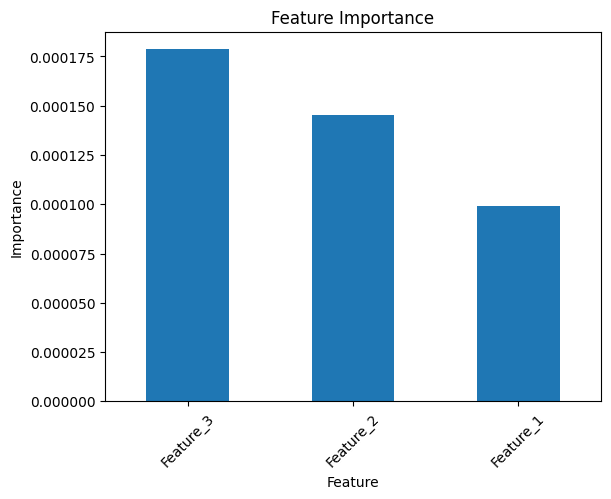

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



    Feature Importance Analysis
    
    1. Overview:
    In a machine learning model, features hold different levels of importance. This analysis provides insights into how each feature influences the model's predictions based on logistic regression coefficients.
    
    2. Key Findings:
    - The most influential feature is 'Feature_3' with an importance score of 0.00. 
    It significantly impacts the model's predictions.
    
    - Conversely, the least influential feature is 'Feature_1' with an importance score of 0.00. 
    This feature has minimal effect on the outcome of the model.
    
    - The range of influence, which is the difference between the most and least influential features, is **0.00**. 
    This highlights the disparity in how much each feature contributes to the model's decision-making process.
    
    3. Detailed Insights:
    - The top 3 most important features are:
    'Feature_3' (importance: 0.00), 'Feature_2' (importance: 0.00), 'Feature_1' (importance:

In [3]:
from transformers import pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Initialize the text generation pipeline using GPT-2
generator = pipeline("text-generation", model="gpt2")

# Sample DataFrame for feature data (replace with your actual data)
# Here we create a mock dataset as an example:
X = pd.DataFrame({
    'Feature_1': [1, 2, 3, 4, 5],
    'Feature_2': [2, 3, 4, 5, 6],
    'Feature_3': [5, 4, 3, 2, 1]
})

y = np.array([1, 0, 1, 0, 1])  # Binary target variable

# Initialize and train the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X, y)

# Get feature importance from the Logistic Regression coefficients
feature_importance = np.abs(log_model.coef_[0])

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# Generate a dynamic prompt for GPT-2
def generate_dynamic_text(importance_df):
    # Get the most and least important features
    most_important = importance_df.iloc[0]
    least_important = importance_df.iloc[-1]
    
    # Get the top and bottom 3 features for additional insights
    top_features = importance_df.head(3)
    bottom_features = importance_df.tail(3)
    
    # Calculate the range and contrast between the most and least important features
    range_contrast = most_important['Importance'] - least_important['Importance']
    
    # Construct a prompt for GPT-2 based on feature importance data
    prompt = f"""
    Feature Importance Analysis
    
    1. Overview:
    In a machine learning model, features hold different levels of importance. This analysis provides insights into how each feature influences the model's predictions based on logistic regression coefficients.
    
    2. Key Findings:
    - The most influential feature is '{most_important['Feature']}' with an importance score of {most_important['Importance']:.2f}. 
    It significantly impacts the model's predictions.
    
    - Conversely, the least influential feature is '{least_important['Feature']}' with an importance score of {least_important['Importance']:.2f}. 
    This feature has minimal effect on the outcome of the model.
    
    - The range of influence, which is the difference between the most and least influential features, is **{range_contrast:.2f}**. 
    This highlights the disparity in how much each feature contributes to the model's decision-making process.
    
    3. Detailed Insights:
    - The top 3 most important features are:
    {', '.join([f"'{row['Feature']}' (importance: {row['Importance']:.2f})" for _, row in top_features.iterrows()])}.
    
    - The bottom 3 least important features are:
    {', '.join([f"'{row['Feature']}' (importance: {row['Importance']:.2f})" for _, row in bottom_features.iterrows()])}.
    
    4. Recommendations:
    - Focus on the top features in subsequent analyses or feature engineering steps.
    - Consider evaluating the least impactful features to determine if they should be removed or transformed.
    - Explore possible interactions between features, especially those that are less important individually but may have an indirect effect.
    """

    return prompt

# Generate dynamic text for GPT-2
dynamic_prompt = generate_dynamic_text(importance_df)

# Generate text from GPT-2
generated_text = generator(dynamic_prompt, max_length=500, num_return_sequences=1)

# Print the generated text
print(generated_text[0]['generated_text'])


Device set to use cpu


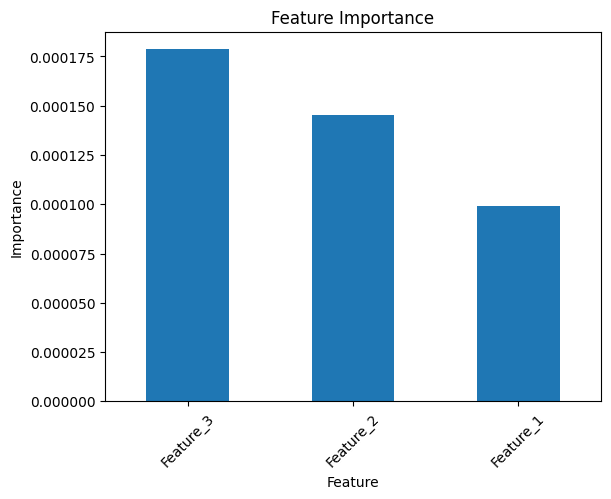

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



    Feature Importance Analysis

    1. Overview:
    In a machine learning model, different features contribute differently to the predictions. The feature importance analysis sheds light on which features are most impactful in the model's predictions.

    2. Key Findings:
    - The most influential feature is 'Feature_3' with an importance score of 0.00. 
    This feature plays a critical role in determining the output of the model.
    
    - The least influential feature is 'Feature_1' with an importance score of 0.00. 
    This feature has the least impact on the model's predictions.
    
    - The range of influence between the most and least influential features is **0.00**, 
    highlighting the contrast in their relevance.

    3. Detailed Insights:
    - Top 3 Features:
    These features have the highest impact on the model:
    'Feature_3' (importance: 0.00), 'Feature_2' (importance: 0.00), 'Feature_1' (importance: 0.00).
    
    - Bottom 3 Features:
    These features c

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from transformers import pipeline

# Initialize the text generation pipeline using GPT-2
generator = pipeline("text-generation", model="gpt2")

# Sample DataFrame for feature data (replace with your actual data)
# This is a mock dataset, replace it with your actual dataset
X = pd.DataFrame({
    'Feature_1': [1, 2, 3, 4, 5],
    'Feature_2': [2, 3, 4, 5, 6],
    'Feature_3': [5, 4, 3, 2, 1]
})

y = np.array([1, 0, 1, 0, 1])  # Binary target variable

# Initialize and train the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X, y)

# Get feature importance from the Logistic Regression coefficients
feature_importance = np.abs(log_model.coef_[0])

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# Dynamically generate a prompt based on feature importance analysis
def generate_dynamic_text(importance_df):
    # Get the most and least important features
    most_important = importance_df.iloc[0]
    least_important = importance_df.iloc[-1]
    
    # Get the top and bottom 3 features for additional insights
    top_features = importance_df.head(3)
    bottom_features = importance_df.tail(3)
    
    # Calculate the range and contrast between the most and least important features
    range_contrast = most_important['Importance'] - least_important['Importance']
    
    # Create a dynamic prompt using the feature importance data
    prompt = f"""
    Feature Importance Analysis

    1. Overview:
    In a machine learning model, different features contribute differently to the predictions. The feature importance analysis sheds light on which features are most impactful in the model's predictions.

    2. Key Findings:
    - The most influential feature is '{most_important['Feature']}' with an importance score of {most_important['Importance']:.2f}. 
    This feature plays a critical role in determining the output of the model.
    
    - The least influential feature is '{least_important['Feature']}' with an importance score of {least_important['Importance']:.2f}. 
    This feature has the least impact on the model's predictions.
    
    - The range of influence between the most and least influential features is **{range_contrast:.2f}**, 
    highlighting the contrast in their relevance.

    3. Detailed Insights:
    - Top 3 Features:
    These features have the highest impact on the model:
    {', '.join([f"'{row['Feature']}' (importance: {row['Importance']:.2f})" for _, row in top_features.iterrows()])}.
    
    - Bottom 3 Features:
    These features contribute the least to the model:
    {', '.join([f"'{row['Feature']}' (importance: {row['Importance']:.2f})" for _, row in bottom_features.iterrows()])}.

    4. Recommendations:
    - Focus on the top features when performing further model refinement or feature engineering.
    - Evaluate whether the bottom features should be removed or modified, as they contribute minimally to the model's performance.
    - Investigate feature interactions that may amplify the impact of the less influential features.
    """

    return prompt

# Generate the dynamic prompt for GPT-2
dynamic_prompt = generate_dynamic_text(importance_df)

# Generate text from GPT-2 based on the dynamic prompt
generated_text = generator(dynamic_prompt, max_length=1000, num_return_sequences=1)

# Print the dynamically generated text
print(generated_text[0]['generated_text'])


In [1]:
import numpy as np
import pandas as pd
import random
import datetime

# Constants for simulation
NUM_RECORDS = 1440  # Number of minutes in a day
BASE_DATE = "2024-12-25"  # Start date

# Generate timestamps for one day (1-minute intervals)
timestamps = pd.date_range(f"{BASE_DATE} 00:00", f"{BASE_DATE} 23:59", freq="1T")

# Simulate Heart Rate (HR)
heart_rate = np.random.normal(70, 10, len(timestamps))  # Mean: 70 bpm, SD: 10 bpm
heart_rate = np.clip(heart_rate, 50, 200)  # Constrain values between 50 and 200

# Simulate Oxygen Saturation (SpO2)
spo2 = np.random.normal(98, 1, len(timestamps))  # Mean: 98%, SD: 1%
spo2 = np.clip(spo2, 90, 100)  # Constrain values between 90% and 100%

# Simulate Step Count
steps = np.random.choice([0, 1, 2, 3], size=len(timestamps))  # Random steps per minute
cumulative_steps = np.cumsum(steps)  # Cumulative step count

# Simulate Calories Burned
calories = steps * np.random.uniform(0.03, 0.06, len(steps))  # Calories per step
cumulative_calories = np.cumsum(calories)

# Simulate Activity Levels
activity_levels = np.random.choice(["Sedentary", "Light", "Moderate", "Vigorous"], 
                                    size=len(timestamps), 
                                    p=[0.6, 0.2, 0.15, 0.05])  # Probabilities for activity levels

# Simulate Sleep Data
sleep_start = random.randint(22, 23)  # Sleep starts between 10 PM and 11 PM
sleep_end = random.randint(6, 7)  # Wake up between 6 AM and 7 AM
sleep_data = [
    "Asleep" if sleep_start <= ts.hour or ts.hour < sleep_end else "Awake"
    for ts in timestamps
]

# Combine data into a DataFrame
synthetic_data = pd.DataFrame({
    "Timestamp": timestamps,
    "Heart Rate (bpm)": heart_rate,
    "SpO2 (%)": spo2,
    "Steps (cumulative)": cumulative_steps,
    "Calories Burned (cumulative)": cumulative_calories,
    "Activity Level": activity_levels,
    "Sleep Status": sleep_data,
})

print(synthetic_data.head())


            Timestamp  Heart Rate (bpm)   SpO2 (%)  Steps (cumulative)  \
0 2024-12-25 00:00:00         68.902322  96.351159                   3   
1 2024-12-25 00:01:00         65.655120  99.106480                   4   
2 2024-12-25 00:02:00         84.024047  99.699985                   6   
3 2024-12-25 00:03:00         71.215030  96.788565                   7   
4 2024-12-25 00:04:00         73.081185  98.115621                   9   

   Calories Burned (cumulative) Activity Level Sleep Status  
0                      0.159407       Vigorous       Asleep  
1                      0.206089      Sedentary       Asleep  
2                      0.279321       Moderate       Asleep  
3                      0.311592      Sedentary       Asleep  
4                      0.424317      Sedentary       Asleep  


D:\Temp\ipykernel_21684\583127354.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(f"{BASE_DATE} 00:00", f"{BASE_DATE} 23:59", freq="1T")


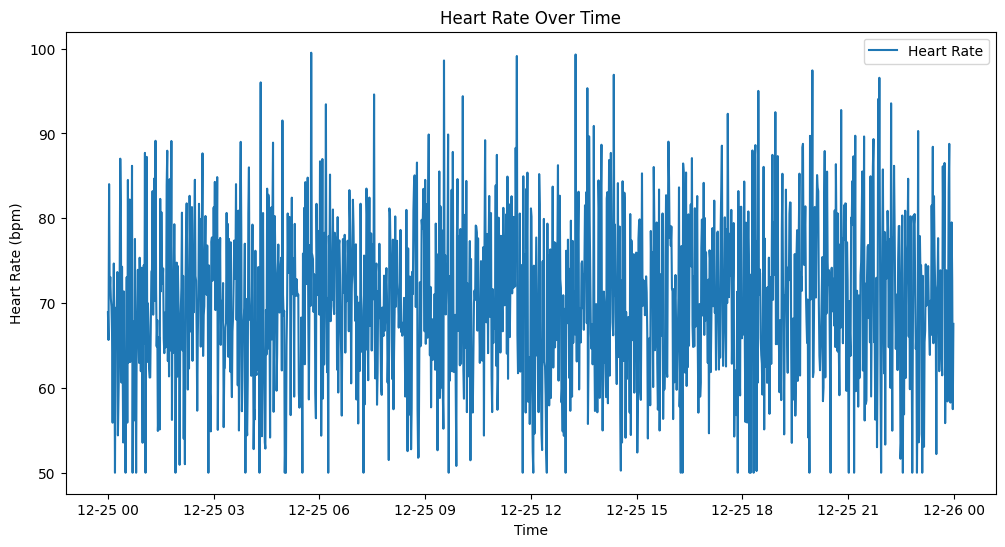

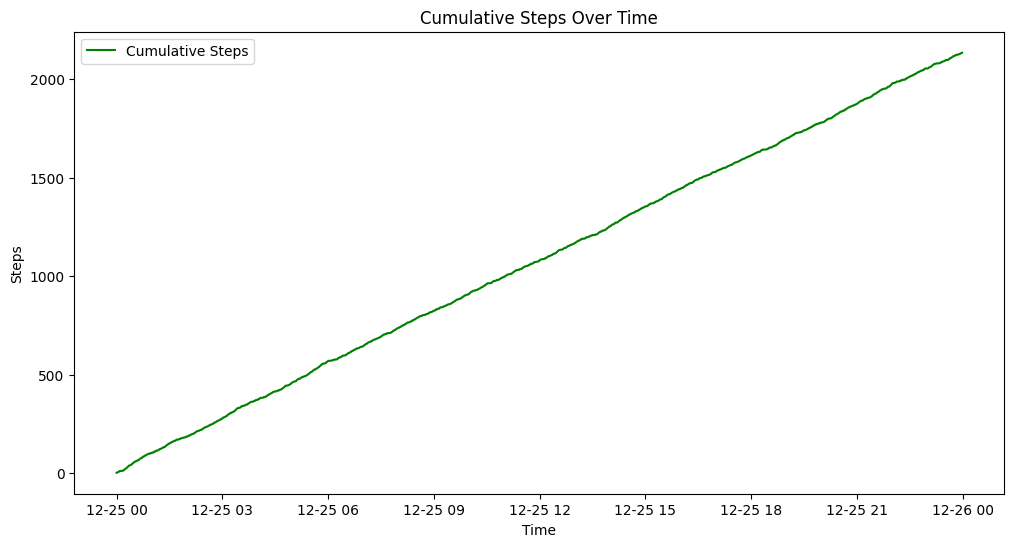

In [2]:
import matplotlib.pyplot as plt

# Heart Rate Over Time
plt.figure(figsize=(12, 6))
plt.plot(synthetic_data["Timestamp"], synthetic_data["Heart Rate (bpm)"], label="Heart Rate")
plt.title("Heart Rate Over Time")
plt.xlabel("Time")
plt.ylabel("Heart Rate (bpm)")
plt.legend()
plt.show()

# Step Count Over Time
plt.figure(figsize=(12, 6))
plt.plot(synthetic_data["Timestamp"], synthetic_data["Steps (cumulative)"], label="Cumulative Steps", color="green")
plt.title("Cumulative Steps Over Time")
plt.xlabel("Time")
plt.ylabel("Steps")
plt.legend()
plt.show()


In [3]:
synthetic_data.to_csv("synthetic_wearable_data.csv", index=False)


In [4]:
import pandas as pd
wearable_data = pd.read_csv("synthetic_wearable_data.csv")
print(wearable_data.head())


             Timestamp  Heart Rate (bpm)   SpO2 (%)  Steps (cumulative)  \
0  2024-12-25 00:00:00         68.902322  96.351159                   3   
1  2024-12-25 00:01:00         65.655120  99.106480                   4   
2  2024-12-25 00:02:00         84.024047  99.699985                   6   
3  2024-12-25 00:03:00         71.215030  96.788565                   7   
4  2024-12-25 00:04:00         73.081185  98.115621                   9   

   Calories Burned (cumulative) Activity Level Sleep Status  
0                      0.159407       Vigorous       Asleep  
1                      0.206089      Sedentary       Asleep  
2                      0.279321       Moderate       Asleep  
3                      0.311592      Sedentary       Asleep  
4                      0.424317      Sedentary       Asleep  


In [5]:
import time

# Real-time simulation
for i in range(0, len(synthetic_data), 60):  # Send 60 rows per minute
    chunk = synthetic_data.iloc[i:i+60]
    print(chunk)
    time.sleep(1)  # Wait for 1 minute (adjust for testing)


             Timestamp  Heart Rate (bpm)    SpO2 (%)  Steps (cumulative)  \
0  2024-12-25 00:00:00         68.902322   96.351159                   3   
1  2024-12-25 00:01:00         65.655120   99.106480                   4   
2  2024-12-25 00:02:00         84.024047   99.699985                   6   
3  2024-12-25 00:03:00         71.215030   96.788565                   7   
4  2024-12-25 00:04:00         73.081185   98.115621                   9   
5  2024-12-25 00:05:00         70.503785   99.532571                  11   
6  2024-12-25 00:06:00         69.605806   99.445837                  12   
7  2024-12-25 00:07:00         66.512569   98.065817                  12   
8  2024-12-25 00:08:00         55.899941   97.900950                  12   
9  2024-12-25 00:09:00         67.620823   97.022497                  13   
10 2024-12-25 00:10:00         74.668573   98.263898                  13   
11 2024-12-25 00:11:00         66.774588   99.280425                  13   
12 2024-12-2

In [6]:
num_rows = len(synthetic_data)
print(f"Total rows: {num_rows}")


Total rows: 1440


In [7]:
total_time = num_rows * 1  # Replace 1 with the interval
print(f"Total time (seconds): {total_time}")
print(f"Total time (minutes): {total_time / 60:.2f}")


Total time (seconds): 1440
Total time (minutes): 24.00


In [8]:
import time
import pandas as pd

# Load synthetic data
synthetic_data = pd.read_csv("synthetic_wearable_data.csv")

# Real-time simulation
for i in range(0, len(synthetic_data), 60):  # Process 60 rows per minute
    chunk = synthetic_data.iloc[i:i+60]  # Select 60 rows
    print(chunk.to_dict(orient='records'))  # Convert rows to dictionary format
    time.sleep(1)  # Wait 1 second for testing (change to 60 for production)


[{'Timestamp': '2024-12-25 00:00:00', 'Heart Rate (bpm)': 68.90232166619607, 'SpO2 (%)': 96.35115861165214, 'Steps (cumulative)': 3, 'Calories Burned (cumulative)': 0.1594069464919021, 'Activity Level': 'Vigorous', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 00:01:00', 'Heart Rate (bpm)': 65.65511970172949, 'SpO2 (%)': 99.10647999179726, 'Steps (cumulative)': 4, 'Calories Burned (cumulative)': 0.2060890263802288, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 00:02:00', 'Heart Rate (bpm)': 84.0240467670355, 'SpO2 (%)': 99.6999845766306, 'Steps (cumulative)': 6, 'Calories Burned (cumulative)': 0.279320708978251, 'Activity Level': 'Moderate', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 00:03:00', 'Heart Rate (bpm)': 71.21503001543913, 'SpO2 (%)': 96.7885651171084, 'Steps (cumulative)': 7, 'Calories Burned (cumulative)': 0.3115916563572722, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 00:04:00', 

In [9]:
# from flask import Flask, request, jsonify

# app = Flask(__name__)

# # In-memory storage
# data_storage = []

# @app.route('/receive_data', methods=['POST'])
# def receive_data():
#     data = request.json  # Receive data
#     data_storage.append(data)  # Store it in memory
#     print("Received data:", data)  # Log to console
#     return jsonify({"message": "Data received successfully"}), 200

# @app.route('/view_data', methods=['GET'])
# def view_data():
#     return jsonify(data_storage), 200

# @app.route('/', methods=['GET'])
# def home():
#     return jsonify({"message": "Server is running!"}), 200

# if __name__ == "__main__":
#     app.run(port=5001)


In [10]:
# import time
# import pandas as pd
# import requests
# import json

# # Load synthetic data
# synthetic_data = pd.read_csv("synthetic_wearable_data.csv")

# # Real-time simulation with data sending to Flask
# for i in range(0, len(synthetic_data), 60):  # Process 60 rows per minute
#     chunk = synthetic_data.iloc[i:i+60]  # Select 60 rows

#     # Convert rows to dictionary format
#     data_to_send = chunk.to_dict(orient='records')

#     # Send data to Flask server using POST request
#     response = requests.post("http://127.0.0.1:5001/receive_data", json=data_to_send)

#     # Check if the request was successful
#     if response.status_code == 200:
#         print("Data sent successfully")
#     else:
#         print(f"Failed to send data: {response.status_code}")

#     time.sleep(60)  # Wait 60 seconds before sending the next chunk (simulating real-time)


In [11]:
import threading
import time
import pandas as pd
import requests
import json
from flask import Flask, request, jsonify

# Flask app code (same as before)
app = Flask(__name__)

data_storage = []

@app.route('/receive_data', methods=['POST'])
def receive_data():
    data = request.json  # Receive data
    data_storage.append(data)  # Store it in memory
    print("Received data:", data)  # Log to console
    return jsonify({"message": "Data received successfully"}), 200

@app.route('/view_data', methods=['GET'])
def view_data():
    return jsonify(data_storage), 200

@app.route('/', methods=['GET'])
def home():
    return jsonify({"message": "Server is running!"}), 200

def run_flask():
    app.run(port=5001)

# Start Flask server in a separate thread
flask_thread = threading.Thread(target=run_flask)
flask_thread.start()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
127.0.0.1 - - [25/Dec/2024 16:12:44] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 00:00:00', 'Heart Rate (bpm)': 68.90232166619607, 'SpO2 (%)': 96.35115861165214, 'Steps (cumulative)': 3, 'Calories Burned (cumulative)': 0.1594069464919021, 'Activity Level': 'Vigorous', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 00:01:00', 'Heart Rate (bpm)': 65.65511970172949, 'SpO2 (%)': 99.10647999179726, 'Steps (cumulative)': 4, 'Calories Burned (cumulative)': 0.2060890263802288, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 00:02:00', 'Heart Rate (bpm)': 84.0240467670355, 'SpO2 (%)': 99.6999845766306, 'Steps (cumulative)': 6, 'Calories Burned (cumulative)': 0.279320708978251, 'Activity Level': 'Moderate', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 00:03:00', 'Heart Rate (bpm)': 71.21503001543913, 'SpO2 (%)': 96.7885651171084, 'Steps (cumulative)': 7, 'Calories Burned (cumulative)': 0.3115916563572722, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12

127.0.0.1 - - [25/Dec/2024 16:12:45] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 01:00:00', 'Heart Rate (bpm)': 70.67280937856381, 'SpO2 (%)': 98.43762620509224, 'Steps (cumulative)': 103, 'Calories Burned (cumulative)': 4.565043279005641, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 01:01:00', 'Heart Rate (bpm)': 74.45537076851103, 'SpO2 (%)': 98.3346691031095, 'Steps (cumulative)': 106, 'Calories Burned (cumulative)': 4.670141165270953, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 01:02:00', 'Heart Rate (bpm)': 65.19915487436904, 'SpO2 (%)': 98.05583513317715, 'Steps (cumulative)': 106, 'Calories Burned (cumulative)': 4.670141165270953, 'Activity Level': 'Light', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 01:03:00', 'Heart Rate (bpm)': 87.71084970297954, 'SpO2 (%)': 96.65042918263244, 'Steps (cumulative)': 106, 'Calories Burned (cumulative)': 4.670141165270953, 'Activity Level': 'Moderate', 'Sleep Status': 'Asleep'}, {'Timestamp': '202

127.0.0.1 - - [25/Dec/2024 16:12:46] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 02:00:00', 'Heart Rate (bpm)': 70.70619791012088, 'SpO2 (%)': 99.25213056135244, 'Steps (cumulative)': 186, 'Calories Burned (cumulative)': 8.041104875346745, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 02:01:00', 'Heart Rate (bpm)': 66.3673564534301, 'SpO2 (%)': 97.68138870246932, 'Steps (cumulative)': 188, 'Calories Burned (cumulative)': 8.11942660699695, 'Activity Level': 'Light', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 02:02:00', 'Heart Rate (bpm)': 50.93354329646752, 'SpO2 (%)': 98.57931397687584, 'Steps (cumulative)': 189, 'Calories Burned (cumulative)': 8.151745223366357, 'Activity Level': 'Moderate', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 02:03:00', 'Heart Rate (bpm)': 65.27288504258429, 'SpO2 (%)': 97.41802143027776, 'Steps (cumulative)': 192, 'Calories Burned (cumulative)': 8.31413255698871, 'Activity Level': 'Moderate', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-1

127.0.0.1 - - [25/Dec/2024 16:12:47] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 03:00:00', 'Heart Rate (bpm)': 81.28444454524772, 'SpO2 (%)': 96.3079641993804, 'Steps (cumulative)': 278, 'Calories Burned (cumulative)': 12.310451938917788, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 03:01:00', 'Heart Rate (bpm)': 75.5321326608914, 'SpO2 (%)': 98.8226927268601, 'Steps (cumulative)': 281, 'Calories Burned (cumulative)': 12.43126389568081, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 03:02:00', 'Heart Rate (bpm)': 84.28965013132523, 'SpO2 (%)': 96.8298749014215, 'Steps (cumulative)': 284, 'Calories Burned (cumulative)': 12.546459315143345, 'Activity Level': 'Light', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 03:03:00', 'Heart Rate (bpm)': 69.1787978912918, 'SpO2 (%)': 97.70521899766418, 'Steps (cumulative)': 284, 'Calories Burned (cumulative)': 12.546459315143345, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '202

127.0.0.1 - - [25/Dec/2024 16:12:48] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 04:00:00', 'Heart Rate (bpm)': 86.00264332226331, 'SpO2 (%)': 97.80181004518488, 'Steps (cumulative)': 373, 'Calories Burned (cumulative)': 16.656946697704832, 'Activity Level': 'Light', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 04:01:00', 'Heart Rate (bpm)': 70.77992415244108, 'SpO2 (%)': 100.0, 'Steps (cumulative)': 376, 'Calories Burned (cumulative)': 16.752319939511832, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 04:02:00', 'Heart Rate (bpm)': 68.01390935625565, 'SpO2 (%)': 99.12243824384676, 'Steps (cumulative)': 376, 'Calories Burned (cumulative)': 16.752319939511832, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 04:03:00', 'Heart Rate (bpm)': 69.33039024387658, 'SpO2 (%)': 98.5975975601806, 'Steps (cumulative)': 379, 'Calories Burned (cumulative)': 16.872654997817623, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25

127.0.0.1 - - [25/Dec/2024 16:12:49] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 05:00:00', 'Heart Rate (bpm)': 69.08754627641908, 'SpO2 (%)': 97.50282114987571, 'Steps (cumulative)': 462, 'Calories Burned (cumulative)': 20.55592150966236, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 05:01:00', 'Heart Rate (bpm)': 50.0, 'SpO2 (%)': 97.75418835933172, 'Steps (cumulative)': 465, 'Calories Burned (cumulative)': 20.731962025999767, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 05:02:00', 'Heart Rate (bpm)': 54.510132086044464, 'SpO2 (%)': 99.61812127279454, 'Steps (cumulative)': 465, 'Calories Burned (cumulative)': 20.731962025999767, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 05:03:00', 'Heart Rate (bpm)': 50.0, 'SpO2 (%)': 97.80270478380903, 'Steps (cumulative)': 466, 'Calories Burned (cumulative)': 20.7684719260987, 'Activity Level': 'Light', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 05:04:00', 'He

127.0.0.1 - - [25/Dec/2024 16:12:50] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 06:00:00', 'Heart Rate (bpm)': 68.63591741569503, 'SpO2 (%)': 99.00300285813624, 'Steps (cumulative)': 570, 'Calories Burned (cumulative)': 25.4697754729406, 'Activity Level': 'Moderate', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 06:01:00', 'Heart Rate (bpm)': 86.718547182861, 'SpO2 (%)': 97.83860968186384, 'Steps (cumulative)': 571, 'Calories Burned (cumulative)': 25.50197870584233, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 06:02:00', 'Heart Rate (bpm)': 81.58992625764058, 'SpO2 (%)': 97.12619831840752, 'Steps (cumulative)': 571, 'Calories Burned (cumulative)': 25.50197870584233, 'Activity Level': 'Light', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 06:03:00', 'Heart Rate (bpm)': 54.366582845524206, 'SpO2 (%)': 96.92163704156184, 'Steps (cumulative)': 571, 'Calories Burned (cumulative)': 25.50197870584233, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-

127.0.0.1 - - [25/Dec/2024 16:12:51] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 07:00:00', 'Heart Rate (bpm)': 72.18655227333487, 'SpO2 (%)': 97.65811581804697, 'Steps (cumulative)': 646, 'Calories Burned (cumulative)': 29.007633833961695, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 07:01:00', 'Heart Rate (bpm)': 67.89494409045712, 'SpO2 (%)': 97.31197141871674, 'Steps (cumulative)': 649, 'Calories Burned (cumulative)': 29.17774397692641, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 07:02:00', 'Heart Rate (bpm)': 76.93318815556472, 'SpO2 (%)': 98.189009843508, 'Steps (cumulative)': 651, 'Calories Burned (cumulative)': 29.25758938358344, 'Activity Level': 'Light', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 07:03:00', 'Heart Rate (bpm)': 58.63024447809221, 'SpO2 (%)': 96.91462416457308, 'Steps (cumulative)': 653, 'Calories Burned (cumulative)': 29.36243940967987, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-1

127.0.0.1 - - [25/Dec/2024 16:12:52] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 08:00:00', 'Heart Rate (bpm)': 80.73404930987736, 'SpO2 (%)': 98.3998329060494, 'Steps (cumulative)': 738, 'Calories Burned (cumulative)': 33.34191842448891, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 08:01:00', 'Heart Rate (bpm)': 76.13870883410138, 'SpO2 (%)': 98.35034439284362, 'Steps (cumulative)': 740, 'Calories Burned (cumulative)': 33.40933667200184, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 08:02:00', 'Heart Rate (bpm)': 73.75710086667503, 'SpO2 (%)': 98.11889571313635, 'Steps (cumulative)': 742, 'Calories Burned (cumulative)': 33.47937390757121, 'Activity Level': 'Moderate', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 08:03:00', 'Heart Rate (bpm)': 65.78998414113136, 'SpO2 (%)': 97.5661129992842, 'Steps (cumulative)': 742, 'Calories Burned (cumulative)': 33.47937390757121, 'Activity Level': 'Light', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-

127.0.0.1 - - [25/Dec/2024 16:12:53] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 09:00:00', 'Heart Rate (bpm)': 84.52680046034435, 'SpO2 (%)': 98.03887862744226, 'Steps (cumulative)': 825, 'Calories Burned (cumulative)': 37.172666131475005, 'Activity Level': 'Light', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 09:01:00', 'Heart Rate (bpm)': 65.19922520656598, 'SpO2 (%)': 98.26191691680594, 'Steps (cumulative)': 826, 'Calories Burned (cumulative)': 37.22853757981933, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 09:02:00', 'Heart Rate (bpm)': 69.91320980227664, 'SpO2 (%)': 97.83076392252002, 'Steps (cumulative)': 826, 'Calories Burned (cumulative)': 37.22853757981933, 'Activity Level': 'Light', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 09:03:00', 'Heart Rate (bpm)': 81.6750129914193, 'SpO2 (%)': 99.57643447573872, 'Steps (cumulative)': 829, 'Calories Burned (cumulative)': 37.33662544513871, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-2

127.0.0.1 - - [25/Dec/2024 16:12:54] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 10:00:00', 'Heart Rate (bpm)': 78.7355776946862, 'SpO2 (%)': 97.38285568762214, 'Steps (cumulative)': 911, 'Calories Burned (cumulative)': 41.02924553961947, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 10:01:00', 'Heart Rate (bpm)': 62.84412828296559, 'SpO2 (%)': 98.56879791311292, 'Steps (cumulative)': 914, 'Calories Burned (cumulative)': 41.14650654670688, 'Activity Level': 'Vigorous', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 10:02:00', 'Heart Rate (bpm)': 69.90531087784986, 'SpO2 (%)': 98.78208555845448, 'Steps (cumulative)': 917, 'Calories Burned (cumulative)': 41.298478952361975, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 10:03:00', 'Heart Rate (bpm)': 69.07962661510291, 'SpO2 (%)': 99.09525240267338, 'Steps (cumulative)': 920, 'Calories Burned (cumulative)': 41.437641028466416, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2

127.0.0.1 - - [25/Dec/2024 16:12:55] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 11:00:00', 'Heart Rate (bpm)': 83.88029182521056, 'SpO2 (%)': 97.5630353543964, 'Steps (cumulative)': 997, 'Calories Burned (cumulative)': 45.00203927824213, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 11:01:00', 'Heart Rate (bpm)': 62.59920501893974, 'SpO2 (%)': 97.82871512903644, 'Steps (cumulative)': 1000, 'Calories Burned (cumulative)': 45.180155217350666, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 11:02:00', 'Heart Rate (bpm)': 87.47852203484308, 'SpO2 (%)': 97.01470943680866, 'Steps (cumulative)': 1001, 'Calories Burned (cumulative)': 45.23192622414047, 'Activity Level': 'Light', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 11:03:00', 'Heart Rate (bpm)': 57.42002906467683, 'SpO2 (%)': 97.55021379211864, 'Steps (cumulative)': 1004, 'Calories Burned (cumulative)': 45.354275673146056, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2

127.0.0.1 - - [25/Dec/2024 16:12:56] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 12:00:00', 'Heart Rate (bpm)': 81.16795899926699, 'SpO2 (%)': 97.76405492671353, 'Steps (cumulative)': 1081, 'Calories Burned (cumulative)': 48.5378586515995, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 12:01:00', 'Heart Rate (bpm)': 80.1901511154053, 'SpO2 (%)': 98.37009050740576, 'Steps (cumulative)': 1084, 'Calories Burned (cumulative)': 48.64130491452421, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 12:02:00', 'Heart Rate (bpm)': 60.71644413857488, 'SpO2 (%)': 99.19467362639676, 'Steps (cumulative)': 1085, 'Calories Burned (cumulative)': 48.68646999790735, 'Activity Level': 'Light', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 12:03:00', 'Heart Rate (bpm)': 52.490442151780655, 'SpO2 (%)': 96.88554542938432, 'Steps (cumulative)': 1085, 'Calories Burned (cumulative)': 48.68646999790735, 'Activity Level': 'Moderate', 'Sleep Status': 'Awake'}, {'Timestamp': '202

127.0.0.1 - - [25/Dec/2024 16:12:57] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 13:00:00', 'Heart Rate (bpm)': 76.17533746325611, 'SpO2 (%)': 98.65621547905738, 'Steps (cumulative)': 1169, 'Calories Burned (cumulative)': 52.39192353152821, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 13:01:00', 'Heart Rate (bpm)': 69.59811234409973, 'SpO2 (%)': 96.80279254120892, 'Steps (cumulative)': 1170, 'Calories Burned (cumulative)': 52.43627747766269, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 13:02:00', 'Heart Rate (bpm)': 67.63467372892477, 'SpO2 (%)': 96.91959223593784, 'Steps (cumulative)': 1173, 'Calories Burned (cumulative)': 52.60173277588377, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 13:03:00', 'Heart Rate (bpm)': 77.47995352305617, 'SpO2 (%)': 97.63364559409362, 'Steps (cumulative)': 1175, 'Calories Burned (cumulative)': 52.71017086661818, 'Activity Level': 'Light', 'Sleep Status': 'Awake'}, {'Timestamp': '2

127.0.0.1 - - [25/Dec/2024 16:12:58] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 14:00:00', 'Heart Rate (bpm)': 88.67251789290401, 'SpO2 (%)': 99.86461677319194, 'Steps (cumulative)': 1253, 'Calories Burned (cumulative)': 55.94538200712857, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 14:01:00', 'Heart Rate (bpm)': 61.20326340327052, 'SpO2 (%)': 97.07589899127368, 'Steps (cumulative)': 1255, 'Calories Burned (cumulative)': 56.04332235372636, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 14:02:00', 'Heart Rate (bpm)': 54.98067320442979, 'SpO2 (%)': 99.75452034742412, 'Steps (cumulative)': 1258, 'Calories Burned (cumulative)': 56.14560486056328, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 14:03:00', 'Heart Rate (bpm)': 60.32196337941979, 'SpO2 (%)': 97.74803941476615, 'Steps (cumulative)': 1261, 'Calories Burned (cumulative)': 56.23921453123939, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp'

127.0.0.1 - - [25/Dec/2024 16:12:59] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 15:00:00', 'Heart Rate (bpm)': 75.84635446058269, 'SpO2 (%)': 97.7838445912597, 'Steps (cumulative)': 1354, 'Calories Burned (cumulative)': 60.28910626351831, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 15:01:00', 'Heart Rate (bpm)': 52.38127161839591, 'SpO2 (%)': 96.88656388241158, 'Steps (cumulative)': 1354, 'Calories Burned (cumulative)': 60.28910626351831, 'Activity Level': 'Light', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 15:02:00', 'Heart Rate (bpm)': 58.579400167745725, 'SpO2 (%)': 98.86755046586138, 'Steps (cumulative)': 1355, 'Calories Burned (cumulative)': 60.34416187017656, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 15:03:00', 'Heart Rate (bpm)': 77.58032447537146, 'SpO2 (%)': 97.42599483898177, 'Steps (cumulative)': 1356, 'Calories Burned (cumulative)': 60.38961429244416, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2

127.0.0.1 - - [25/Dec/2024 16:13:00] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 16:00:00', 'Heart Rate (bpm)': 71.69138485406481, 'SpO2 (%)': 98.20162060789846, 'Steps (cumulative)': 1445, 'Calories Burned (cumulative)': 64.61809890485924, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 16:01:00', 'Heart Rate (bpm)': 71.38754975835357, 'SpO2 (%)': 97.92005394500114, 'Steps (cumulative)': 1446, 'Calories Burned (cumulative)': 64.66114028512308, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 16:02:00', 'Heart Rate (bpm)': 56.32413616825495, 'SpO2 (%)': 96.858342760685, 'Steps (cumulative)': 1448, 'Calories Burned (cumulative)': 64.75786815273618, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 16:03:00', 'Heart Rate (bpm)': 71.65319681407189, 'SpO2 (%)': 97.87404260252656, 'Steps (cumulative)': 1448, 'Calories Burned (cumulative)': 64.75786815273618, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': 

127.0.0.1 - - [25/Dec/2024 16:13:01] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 17:00:00', 'Heart Rate (bpm)': 68.29705933110418, 'SpO2 (%)': 97.2860884453698, 'Steps (cumulative)': 1531, 'Calories Burned (cumulative)': 68.44711497641211, 'Activity Level': 'Light', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 17:01:00', 'Heart Rate (bpm)': 62.94602247438253, 'SpO2 (%)': 98.28101753545565, 'Steps (cumulative)': 1534, 'Calories Burned (cumulative)': 68.60195842634648, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 17:02:00', 'Heart Rate (bpm)': 72.76399153953886, 'SpO2 (%)': 99.71463986340244, 'Steps (cumulative)': 1536, 'Calories Burned (cumulative)': 68.7121817612496, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 17:03:00', 'Heart Rate (bpm)': 54.65048190924647, 'SpO2 (%)': 96.63227685669708, 'Steps (cumulative)': 1536, 'Calories Burned (cumulative)': 68.7121817612496, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024

127.0.0.1 - - [25/Dec/2024 16:13:02] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 18:00:00', 'Heart Rate (bpm)': 69.61219673412472, 'SpO2 (%)': 96.84599059978764, 'Steps (cumulative)': 1613, 'Calories Burned (cumulative)': 72.12517009603174, 'Activity Level': 'Moderate', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 18:01:00', 'Heart Rate (bpm)': 67.29621530413107, 'SpO2 (%)': 99.004473688799, 'Steps (cumulative)': 1614, 'Calories Burned (cumulative)': 72.17752457199707, 'Activity Level': 'Moderate', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 18:02:00', 'Heart Rate (bpm)': 66.29524358943763, 'SpO2 (%)': 97.54710807268845, 'Steps (cumulative)': 1616, 'Calories Burned (cumulative)': 72.27530745224576, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 18:03:00', 'Heart Rate (bpm)': 84.33190791648664, 'SpO2 (%)': 98.15373820233376, 'Steps (cumulative)': 1618, 'Calories Burned (cumulative)': 72.36279128672813, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2

127.0.0.1 - - [25/Dec/2024 16:13:03] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 19:00:00', 'Heart Rate (bpm)': 87.33304309612689, 'SpO2 (%)': 98.01855153465632, 'Steps (cumulative)': 1698, 'Calories Burned (cumulative)': 75.81387286227185, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 19:01:00', 'Heart Rate (bpm)': 65.13779173969995, 'SpO2 (%)': 97.1957149652904, 'Steps (cumulative)': 1700, 'Calories Burned (cumulative)': 75.92248196931646, 'Activity Level': 'Moderate', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 19:02:00', 'Heart Rate (bpm)': 65.85741817921331, 'SpO2 (%)': 98.07492621580634, 'Steps (cumulative)': 1702, 'Calories Burned (cumulative)': 76.0327824423954, 'Activity Level': 'Light', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 19:03:00', 'Heart Rate (bpm)': 59.4916808675724, 'SpO2 (%)': 98.12120383964438, 'Steps (cumulative)': 1702, 'Calories Burned (cumulative)': 76.0327824423954, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-1

127.0.0.1 - - [25/Dec/2024 16:13:04] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 20:00:00', 'Heart Rate (bpm)': 61.2767596679917, 'SpO2 (%)': 97.84190121914408, 'Steps (cumulative)': 1780, 'Calories Burned (cumulative)': 79.48464123620695, 'Activity Level': 'Light', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 20:01:00', 'Heart Rate (bpm)': 61.85769552221211, 'SpO2 (%)': 97.23307535607783, 'Steps (cumulative)': 1780, 'Calories Burned (cumulative)': 79.48464123620695, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 20:02:00', 'Heart Rate (bpm)': 70.56206051973217, 'SpO2 (%)': 98.31575466607144, 'Steps (cumulative)': 1781, 'Calories Burned (cumulative)': 79.53303607743042, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 20:03:00', 'Heart Rate (bpm)': 81.32909809958778, 'SpO2 (%)': 98.19399812360346, 'Steps (cumulative)': 1782, 'Calories Burned (cumulative)': 79.56700552967763, 'Activity Level': 'Light', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-1

127.0.0.1 - - [25/Dec/2024 16:13:05] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 21:00:00', 'Heart Rate (bpm)': 62.23231958488804, 'SpO2 (%)': 96.69733574932869, 'Steps (cumulative)': 1875, 'Calories Burned (cumulative)': 83.81764385078503, 'Activity Level': 'Moderate', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 21:01:00', 'Heart Rate (bpm)': 50.0, 'SpO2 (%)': 97.93849872072845, 'Steps (cumulative)': 1876, 'Calories Burned (cumulative)': 83.85924626092569, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 21:02:00', 'Heart Rate (bpm)': 70.24720957787221, 'SpO2 (%)': 94.86249371224451, 'Steps (cumulative)': 1879, 'Calories Burned (cumulative)': 83.99817176297014, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 21:03:00', 'Heart Rate (bpm)': 66.35895707328304, 'SpO2 (%)': 96.84777446712428, 'Steps (cumulative)': 1882, 'Calories Burned (cumulative)': 84.13930961453225, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 

127.0.0.1 - - [25/Dec/2024 16:13:06] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 22:00:00', 'Heart Rate (bpm)': 72.44327479243721, 'SpO2 (%)': 97.459561572221, 'Steps (cumulative)': 1977, 'Calories Burned (cumulative)': 88.21251417860643, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 22:01:00', 'Heart Rate (bpm)': 61.71515229970269, 'SpO2 (%)': 98.27521072848752, 'Steps (cumulative)': 1980, 'Calories Burned (cumulative)': 88.38334387622457, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 22:02:00', 'Heart Rate (bpm)': 78.3908967435398, 'SpO2 (%)': 98.57094383100528, 'Steps (cumulative)': 1980, 'Calories Burned (cumulative)': 88.38334387622457, 'Activity Level': 'Light', 'Sleep Status': 'Awake'}, {'Timestamp': '2024-12-25 22:03:00', 'Heart Rate (bpm)': 53.31538055388312, 'SpO2 (%)': 96.65305546090904, 'Steps (cumulative)': 1980, 'Calories Burned (cumulative)': 88.38334387622457, 'Activity Level': 'Sedentary', 'Sleep Status': 'Awake'}, {'Timestamp': '2024

127.0.0.1 - - [25/Dec/2024 16:13:07] "POST /receive_data HTTP/1.1" 200 -


Received data: [{'Timestamp': '2024-12-25 23:00:00', 'Heart Rate (bpm)': 53.58254732482986, 'SpO2 (%)': 98.60548477875402, 'Steps (cumulative)': 2054, 'Calories Burned (cumulative)': 91.94440392591191, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 23:01:00', 'Heart Rate (bpm)': 54.5701119385899, 'SpO2 (%)': 99.16702322331832, 'Steps (cumulative)': 2055, 'Calories Burned (cumulative)': 91.9937672121888, 'Activity Level': 'Moderate', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 23:02:00', 'Heart Rate (bpm)': 77.89796562328699, 'SpO2 (%)': 98.3175052453158, 'Steps (cumulative)': 2057, 'Calories Burned (cumulative)': 92.0748854820427, 'Activity Level': 'Moderate', 'Sleep Status': 'Asleep'}, {'Timestamp': '2024-12-25 23:03:00', 'Heart Rate (bpm)': 73.24820356634088, 'SpO2 (%)': 97.85940550352662, 'Steps (cumulative)': 2060, 'Calories Burned (cumulative)': 92.21456642427638, 'Activity Level': 'Sedentary', 'Sleep Status': 'Asleep'}, {'Timestamp': 

In [12]:
# Load synthetic data
synthetic_data = pd.read_csv("synthetic_wearable_data.csv")

# Real-time simulation with data sending to Flask
for i in range(0, len(synthetic_data), 60):  # Process 60 rows per minute
    chunk = synthetic_data.iloc[i:i+60]  # Select 60 rows

    # Convert rows to dictionary format
    data_to_send = chunk.to_dict(orient='records')

    # Send data to Flask server using POST request
    response = requests.post("http://127.0.0.1:5001/receive_data", json=data_to_send)

    # Check if the request was successful
    if response.status_code == 200:
        print("Data sent successfully")
    else:
        print(f"Failed to send data: {response.status_code}")

    time.sleep(1)  # Wait 60 seconds before sending the next chunk (simulating real-time)


Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
Data sent successfully
